##                                         PREDICTION OF PRODUCT BACK ORDERS 

## PROBLEM STATEMENT

* When a customer orders a product, which is not available in the store or temporary out of stock, and the customer decides to wait until the product is available and promised to be shipped, then this scenario is called backorder of that specific product. A backorder generally indicates that the customer demand for a product or a service exceeds a company’s capacity to supply it. Product backorder may be the result of strong sales performance (e.g., the product is in such high demand that production cannot keep up with sales). However, backorders can upset consumers, leading to canceled orders and decreased customer loyalty. Companies want to avoid backorders, but also avoid overstocking every product (leading to higher inventory costs). Our task is to design a Machine Learning Model that helps us to predict the back-orders of products in advance based on the features provided.

## Import the required libraries

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (18,10)

## Read the data

* Load the csv file and print the first five observations.

In [83]:
df = pd.read_csv('Product_BackOrders.csv')
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


## The data definition is as follows:

* **sku** - Stock Keeping Unit

* **national_inv** - National inventory visibility

* **lead_time** - Transit time

* **in_transit_qty** - Quantity of items in transit

* **forecast_3_month** - Forecast for three months

* **forecast_6_month** - Forecast for six months

* **forecast_9_month** - Forecast for nine months

* **sales_1_month** - Demand spreads for 1 month

* **sales_3_month** - Demand spread for 3 months

* **sales_6_month** - Demand spread for 6 months

* **sales_9_month** - Demand spread for 9 months

* **min_bank** - Minimum recommended amount in stock

* **potential_issue** - Potential issue with the item

* **pieces_past_due** - Items that are overdue

* **perf_6_month_avg** - Item performance in the past 6 months

* **perf_12_month_avg** - Item performance in past 12 months

* **local_bo_qty**- Amount of stock orders overdue

* **deck_risk** – Part risk flag

* **oe_constraint** – Part risk flag

* **ppap_risk** – Part risk flag

* **stop_auto_buy** – Part risk flag

* **rev_stop** – Part risk flag

* **went_on_back_order** - Product went on backorder

**1. DATA DIMENSION :**

In [4]:
df.shape

(1687861, 23)

In [5]:
print('In this dataset, No.of.rows are :',df.shape[0])
print('In this dataset, No.of.columns are :',df.shape[1])

In this dataset, No.of.rows are : 1687861
In this dataset, No.of.columns are : 23


**2. INFO FOR ALL FEATURES :**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

**3. STATISTICAL SUMMARY :**

In [7]:
df.describe() #Statistical Summary for numerical features

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


In [151]:
df.select_dtypes(include='object').describe().T #Statistical Summary for category features

,count,unique,top,freq
potential_issue,1687860,2,No,1686953
deck_risk,1687860,2,No,1300377
oe_constraint,1687860,2,No,1687615
ppap_risk,1687860,2,No,1484026
stop_auto_buy,1687860,2,Yes,1626774
rev_stop,1687860,2,No,1687129
went_on_backorder,1687860,2,No,1676567


**4. MISSING VALUE ANALYSIS :**

In [8]:
df.isnull().sum()

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [9]:
#INFERENCE : In lead_time('Transit time') has more null values and other features has one null value

**5. SPLIT THE DATA (NUM Vs CAT) :**

In [84]:
num = df.select_dtypes(exclude='object')
num.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.00,-99.00,0.0
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99,0.99,0.0
2,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.00,-99.00,0.0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.10,0.13,0.0
4,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,-99.00,-99.00,0.0


In [85]:
df.drop(columns='sku',inplace=True)

* sku contains unique values, this feature is redundant. So droping the feature for further analysis.

In [86]:
cat = df.select_dtypes(include='object')
cat.head()

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,No,No,No,No,Yes,No,No
1,No,No,No,No,Yes,No,No
2,No,Yes,No,No,Yes,No,No
3,No,No,No,No,Yes,No,No
4,No,Yes,No,No,Yes,No,No


**6. UNIVARIATE ANALYSIS :**

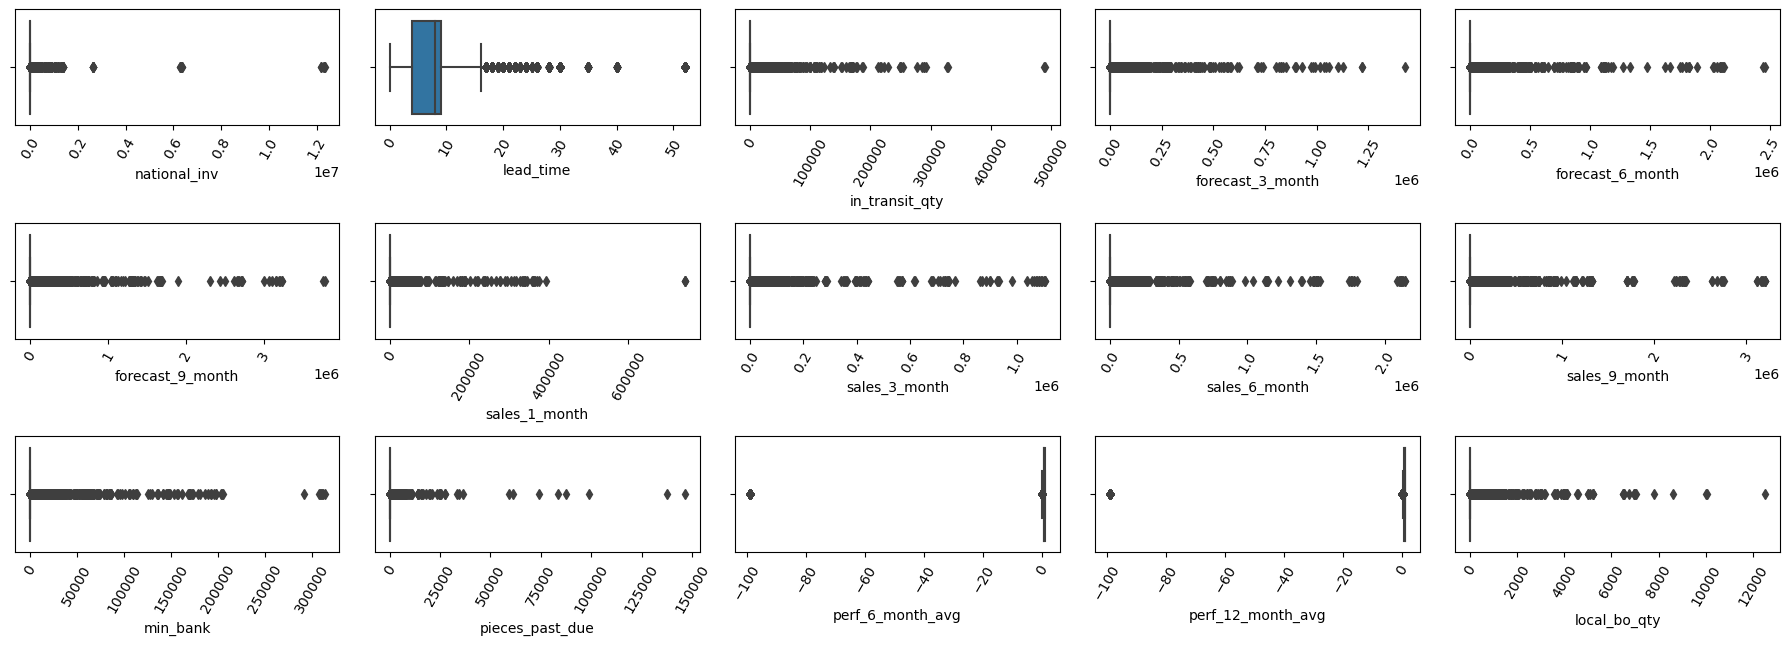

In [82]:
#NUMERICAL FEATURES
nrows = 5
ncols = 5
iterator = 1
for i in num.columns:
    plt.subplot(nrows,ncols,iterator)
    sns.boxplot(df[i])
    iterator += 1
    plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

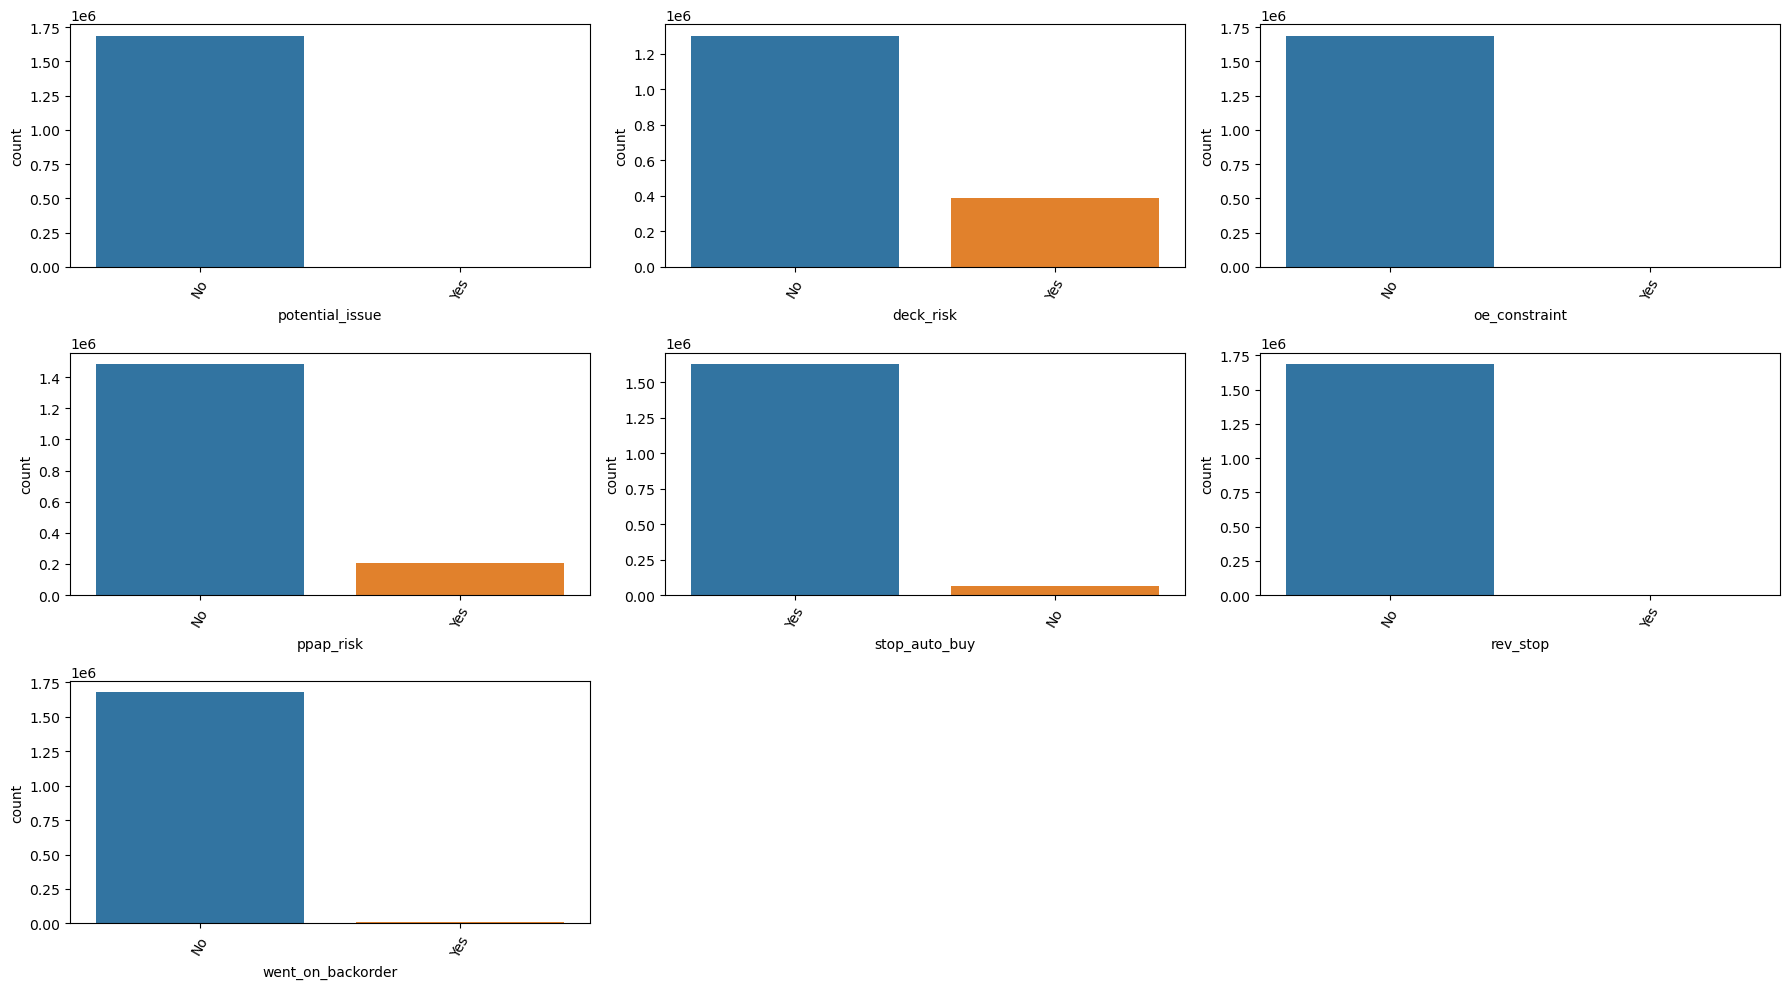

In [53]:
#CATEGORICAL FEATURES
nrows = 3
ncols = 3
iterator = 1
for i in cat.columns:
    plt.subplot(nrows,ncols,iterator)
    sns.countplot(df[i])
    iterator += 1
    plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

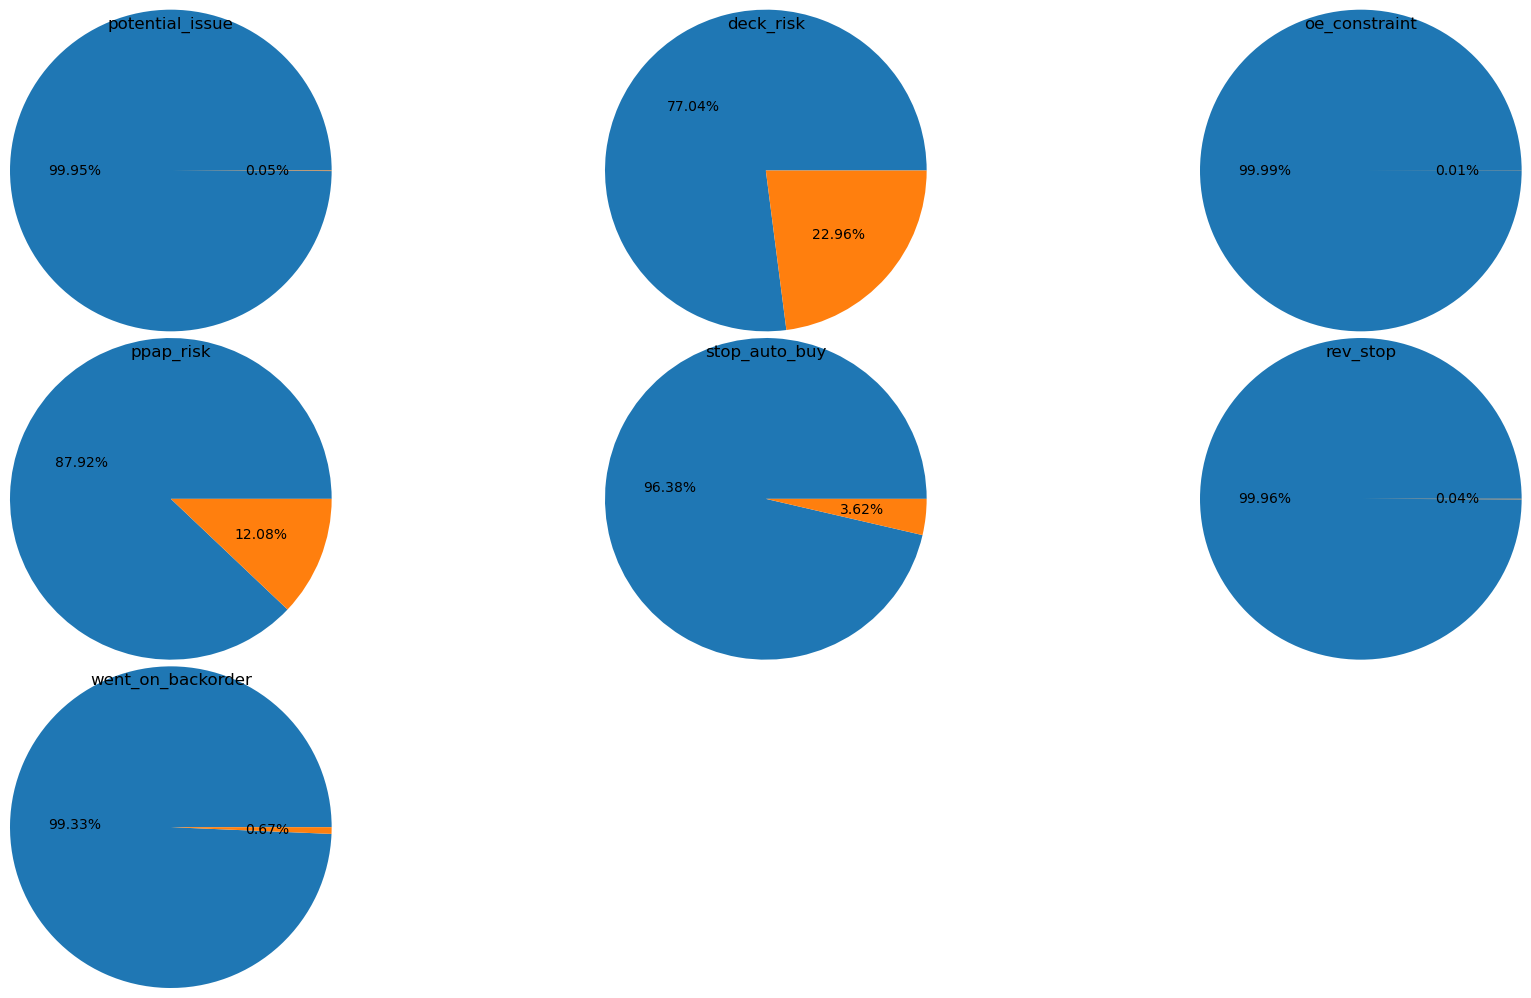

In [69]:
nrows = 3
ncols = 3
iterator = 1
for i in cat.columns:
    plt.subplot(nrows,ncols,iterator)
    plt.pie(df[i].value_counts(normalize=True),autopct='%.2f%%',radius=1.5)
    plt.title(i)
    iterator += 1
    plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

* deck_risk: There is a small possibility of deck risk.  
* ppap_risk: The frequency of ppap risk is low. 
* stop_auto_buy: The risk of stop auto buy occurrence is very high. 
* There is zero risk of potential_issue, oe_constraint or rev_stop. 

<AxesSubplot:>

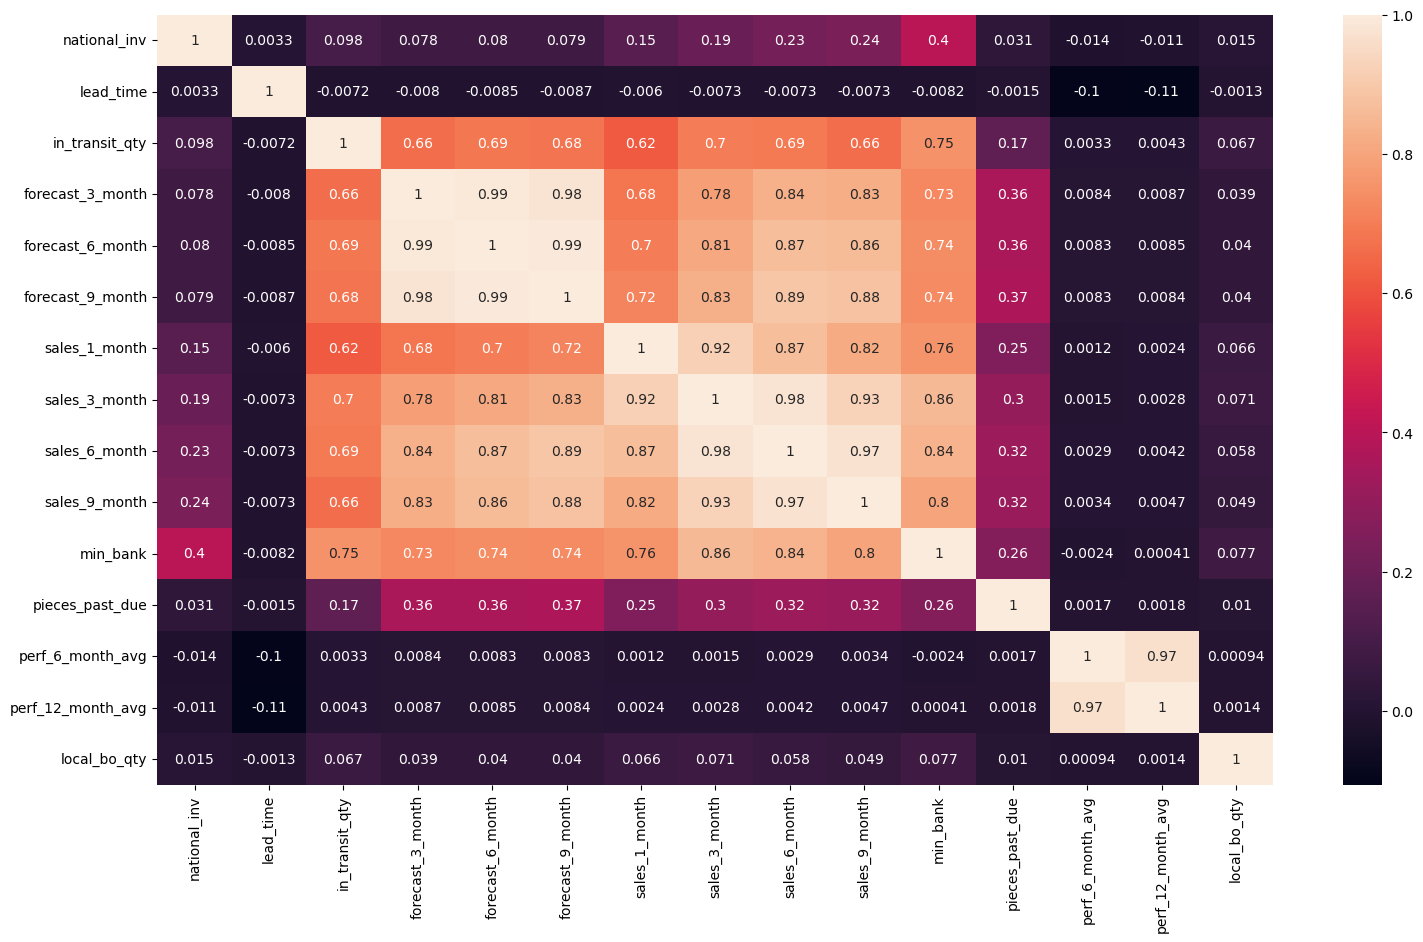

In [25]:
sns.heatmap(num.corr(),annot=True)

* From the correlation matrix, we can easily interpret that feature ‘in_transit_qty’, ‘min_bank’, ‘forecast_3_month’, ‘forecast_6_month’ are more correlated with each other.  
* ‘sales_1_month’, ‘sales_3_month’,sales_6_month’, ‘sales_9_month’ are also highly correlated with the variables mentioned above. 
* Also, the perf_6_months_avg and perf_12_months_avg is highly correlated with each other. 
* Apart from the above-mentioned features, other features are very weakly correlated. 

## 7. BIVARIATE

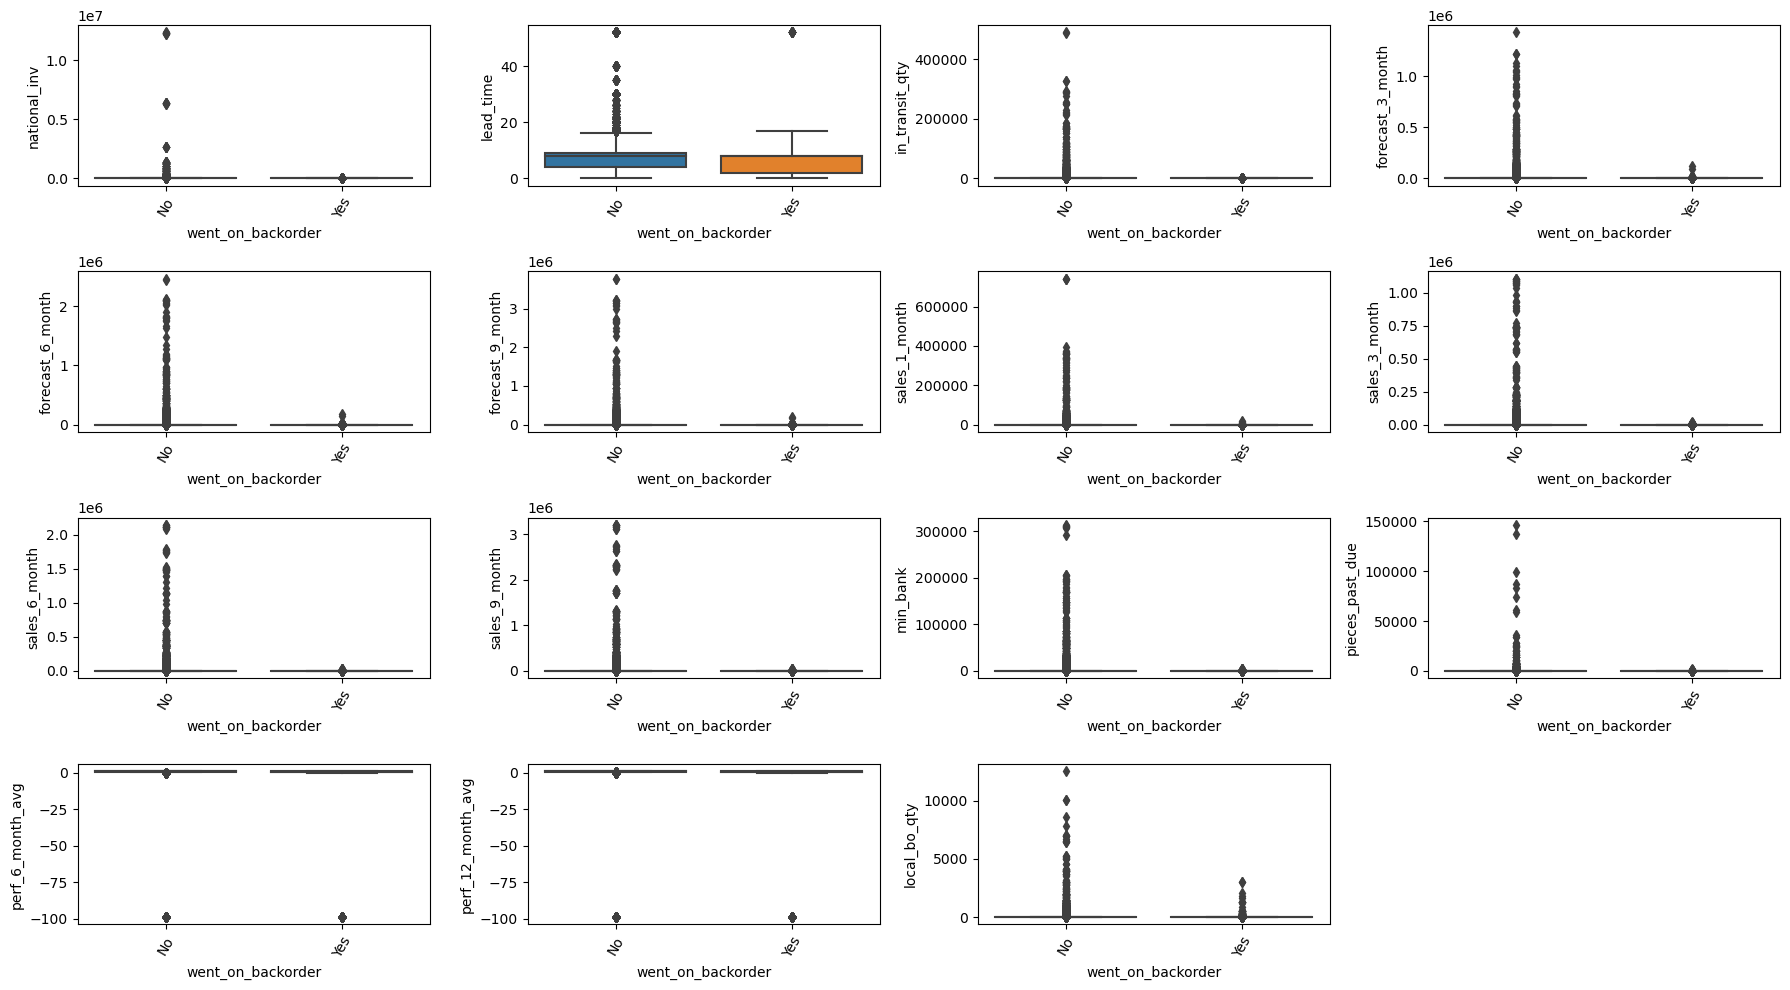

In [50]:
#NUM VS TARGET
nrows = 4
ncols = 4
iterator = 1
for i in num.columns:
    plt.subplot(nrows,ncols,iterator)
    sns.boxplot(df['went_on_backorder'],df[i])
    iterator += 1
    plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

* Since the dataset contained extreme outliers, the boxplots used for analysis did not offer much of information or conclusions about the patterns of data. For further analysis we use transformation techniques for reducing the outliers

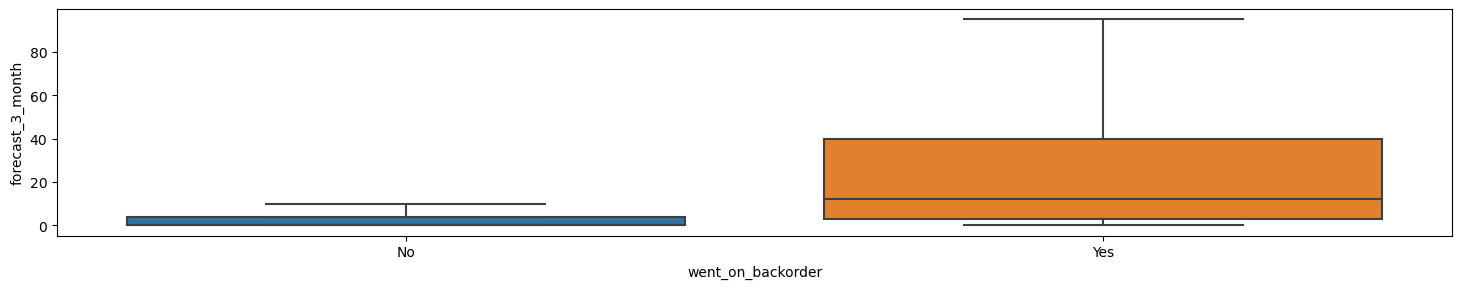

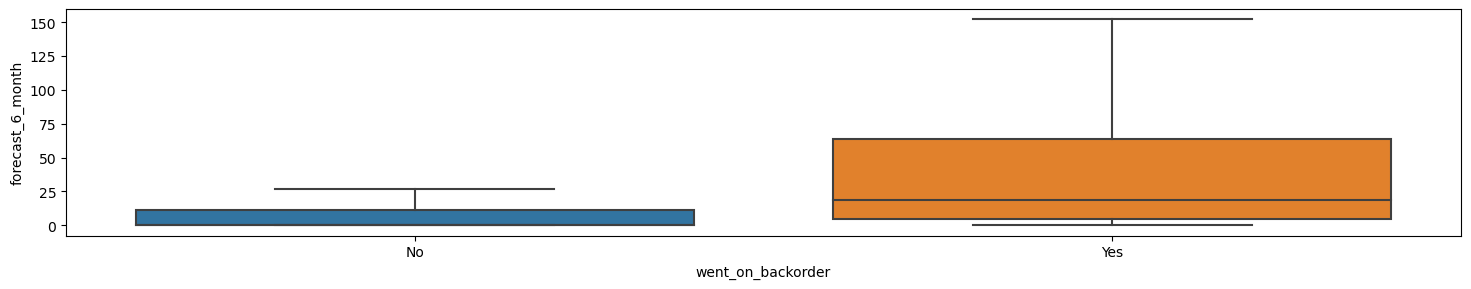

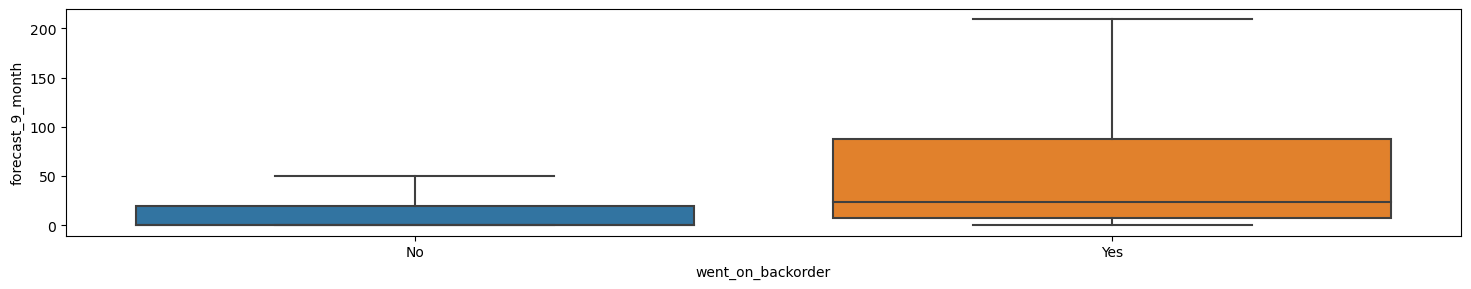

In [69]:
plt.subplot(3,1,1)
sns.boxplot( x=df["went_on_backorder"] ,y=df["forecast_3_month"],showfliers=False)
plt.show()
plt.subplot(3,1,2)
sns.boxplot( x=df["went_on_backorder"] ,y=df["forecast_6_month"],showfliers=False)
plt.show()
plt.subplot(3,1,3)
sns.boxplot( x=df["went_on_backorder"] ,y=df["forecast_9_month"],showfliers=False)
plt.show()


* Forecast sales for the next 3,6 and 9 months are higher in case of the product went on backorder compare to products not went on backorder.
* Products which have higher forecast sales are more inclined to get backordered when compared to products having less forecast sales.

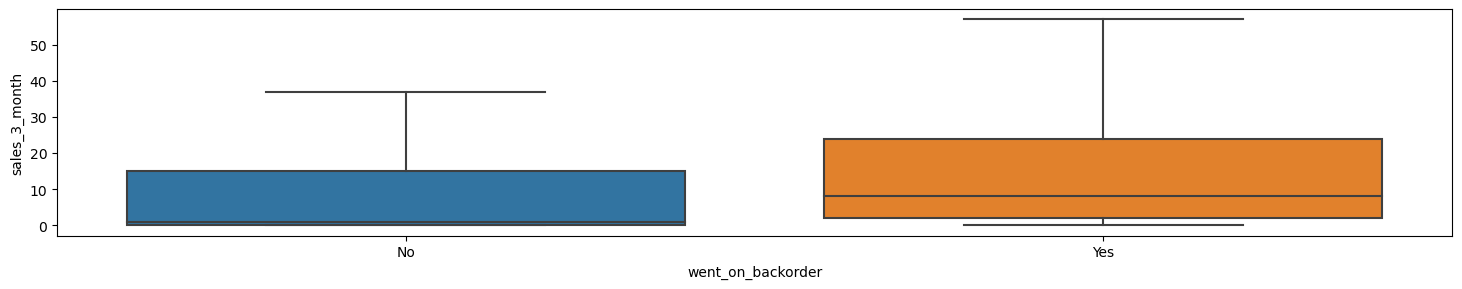

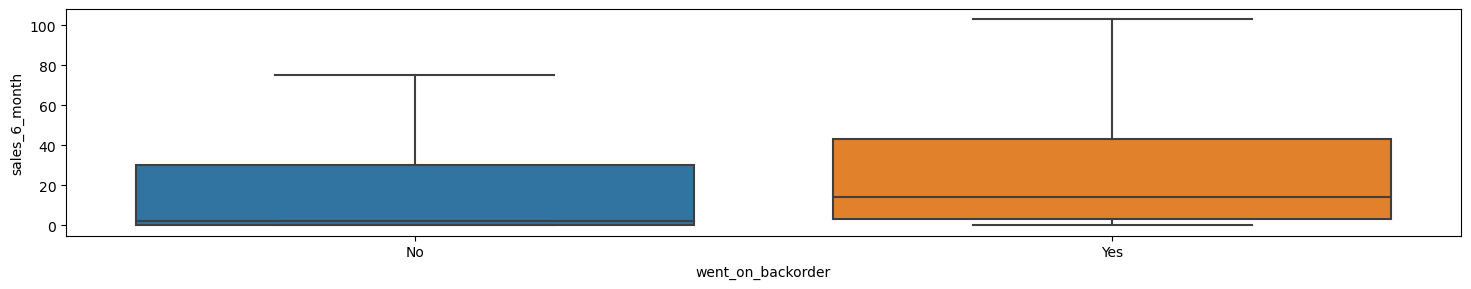

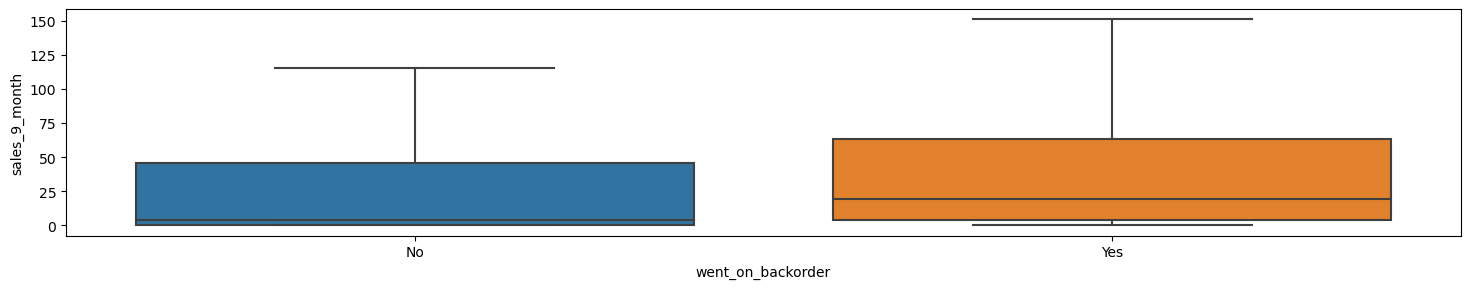

In [70]:
plt.subplot(3,1,1)
sns.boxplot( x=df["went_on_backorder"] ,y=df["sales_3_month"],showfliers=False)
plt.show()
plt.subplot(3,1,2)
sns.boxplot( x=df["went_on_backorder"] ,y=df["sales_6_month"],showfliers=False)
plt.show()
plt.subplot(3,1,3)
sns.boxplot( x=df["went_on_backorder"] ,y=df["sales_9_month"],showfliers=False)
plt.show()

* From the above plots, it can be observed that for sales 3 month, 6 months and 9 months, sales is higher in case of the product went on backorder.
* Higher the sales of the product, More are the chances of that product going into backorders.

In [57]:
p=['forecast_3_month','forecast_6_month', 'forecast_9_month','sales_3_month', 'sales_6_month', 'sales_9_month']

<AxesSubplot:>

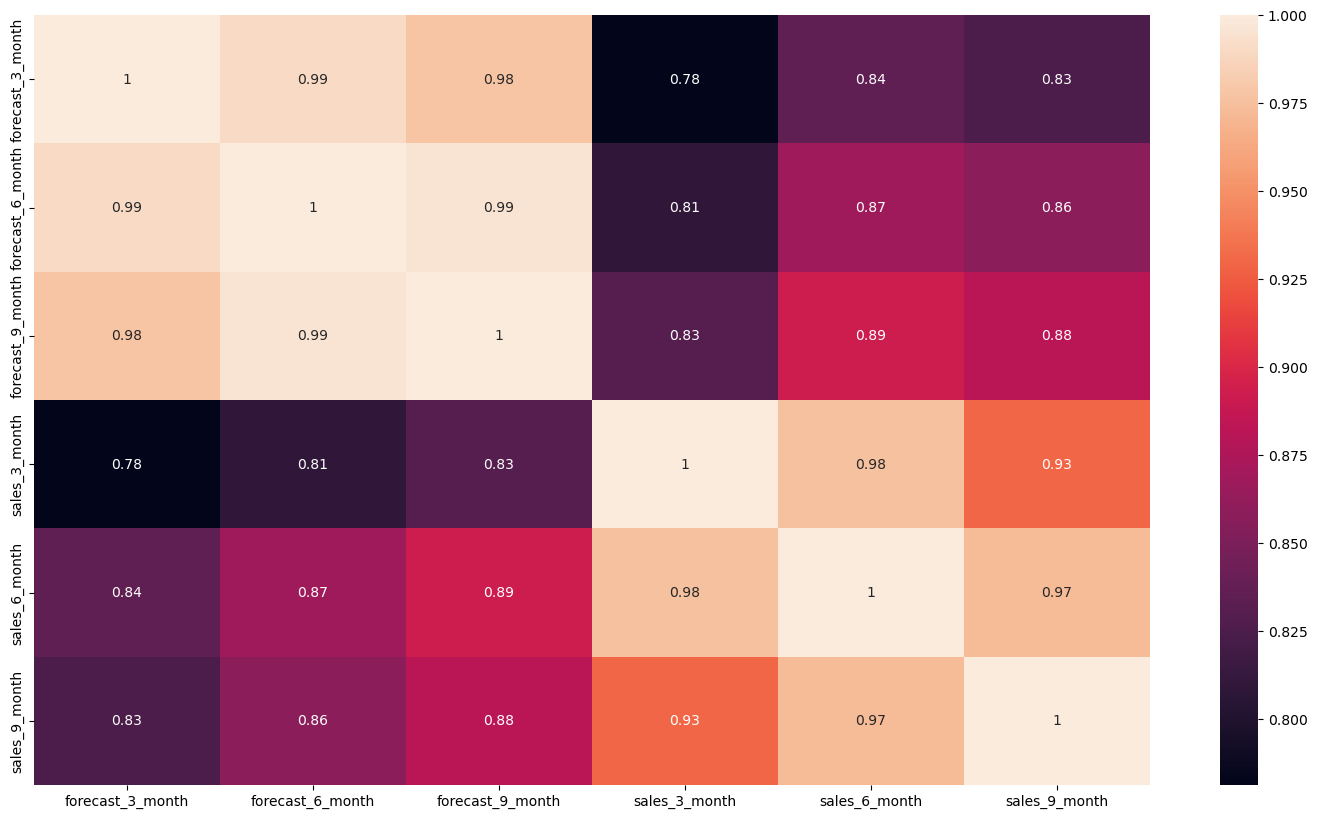

In [58]:
sns.heatmap(df[p].corr(),annot=True)

* Forecast 3,6,9 months have good correlation with corresponding sales 3,6,9months.
* Forecast 3,6,9months are highly correlated with each other, Similarly sales 3,6,9 months are highly correlated with each other.

In [100]:
for i in cat.columns:
    print(pd.crosstab(df[i],df['went_on_backorder']))
    print('------*------')

went_on_backorder       No    Yes
potential_issue                  
No                 1675711  11242
Yes                    856     51
------*------
went_on_backorder       No   Yes
deck_risk                       
No                 1291000  9377
Yes                 385567  1916
------*------
went_on_backorder       No    Yes
oe_constraint                    
No                 1676330  11285
Yes                    237      8
------*------
went_on_backorder       No   Yes
ppap_risk                       
No                 1474492  9534
Yes                 202075  1759
------*------
went_on_backorder       No    Yes
stop_auto_buy                    
No                   60615    471
Yes                1615952  10822
------*------
went_on_backorder       No    Yes
rev_stop                         
No                 1675836  11293
Yes                    731      0
------*------
went_on_backorder       No    Yes
went_on_backorder                
No                 1676567      0
Yes   

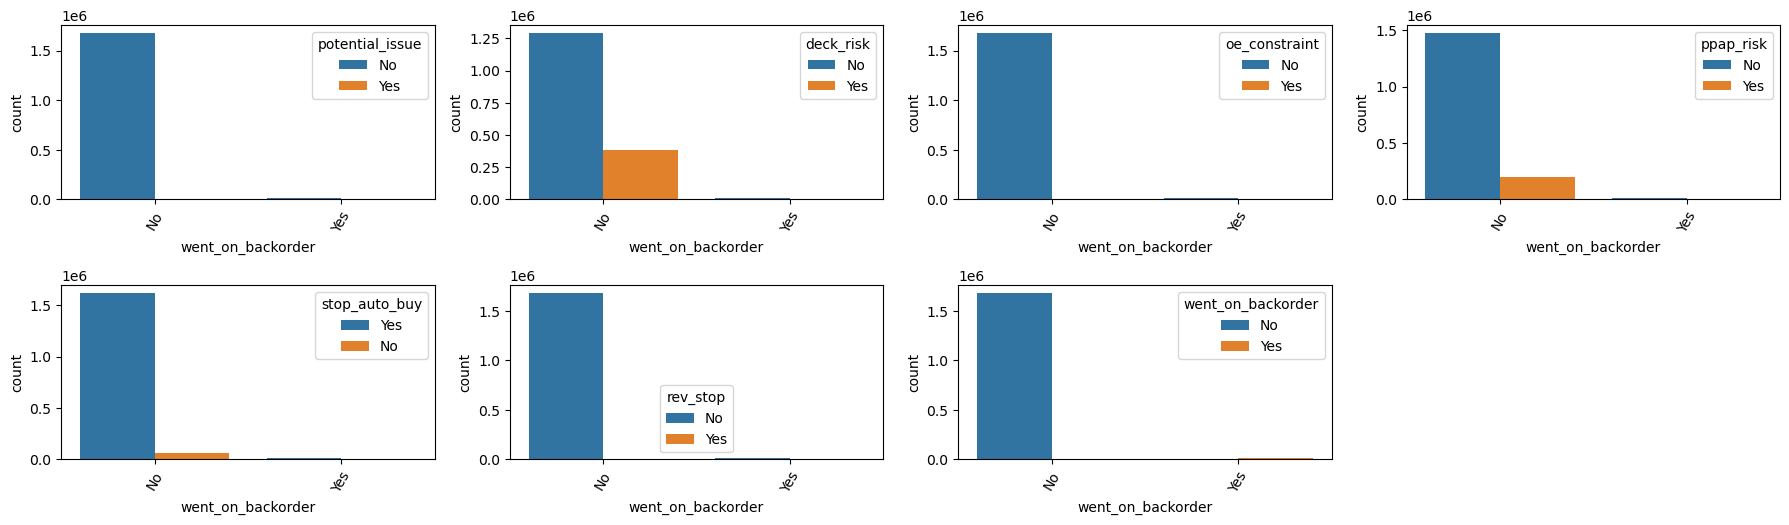

In [55]:
#NUM VS TARGET
nrows = 4
ncols = 4
iterator = 1
for i in cat.columns:
    plt.subplot(nrows,ncols,iterator)
    sns.countplot(df['went_on_backorder'],hue=df[i])
    iterator += 1
    plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

* 1. Products which have no potential issue have high possibility of not going on back-order 
* 2. Items which have no deck_risk have very less chances of going into back order but products which have deck_risk also does not go on back-order 
* 3. Products which have no oe_constraint have no chances of going into back-orders 
* 4. Products which have no rev_stop have high chances of not going into back-order 
* 5. Items which have no ppap_risk have great chances of not going into back-order.

potential_issue         No  Yes
went_on_backorder              
No                 1675711  856
Yes                  11242   51


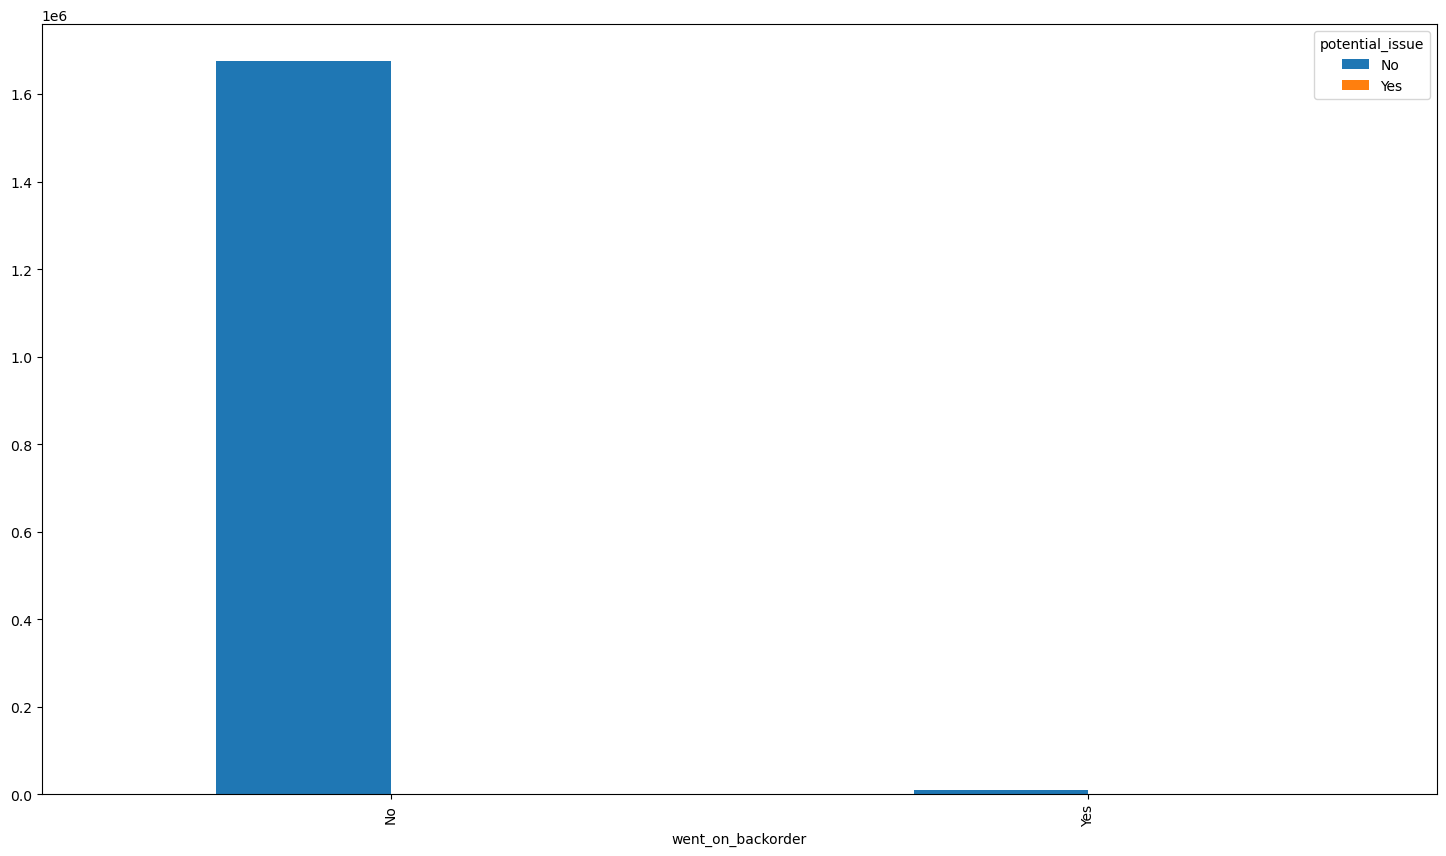

In [97]:
pd.crosstab(df['went_on_backorder'],df['potential_issue']).plot(kind='bar')
print(pd.crosstab(df['went_on_backorder'],df['potential_issue']))
plt.show()

<AxesSubplot:xlabel='forecast_9_month', ylabel='forecast_3_month'>

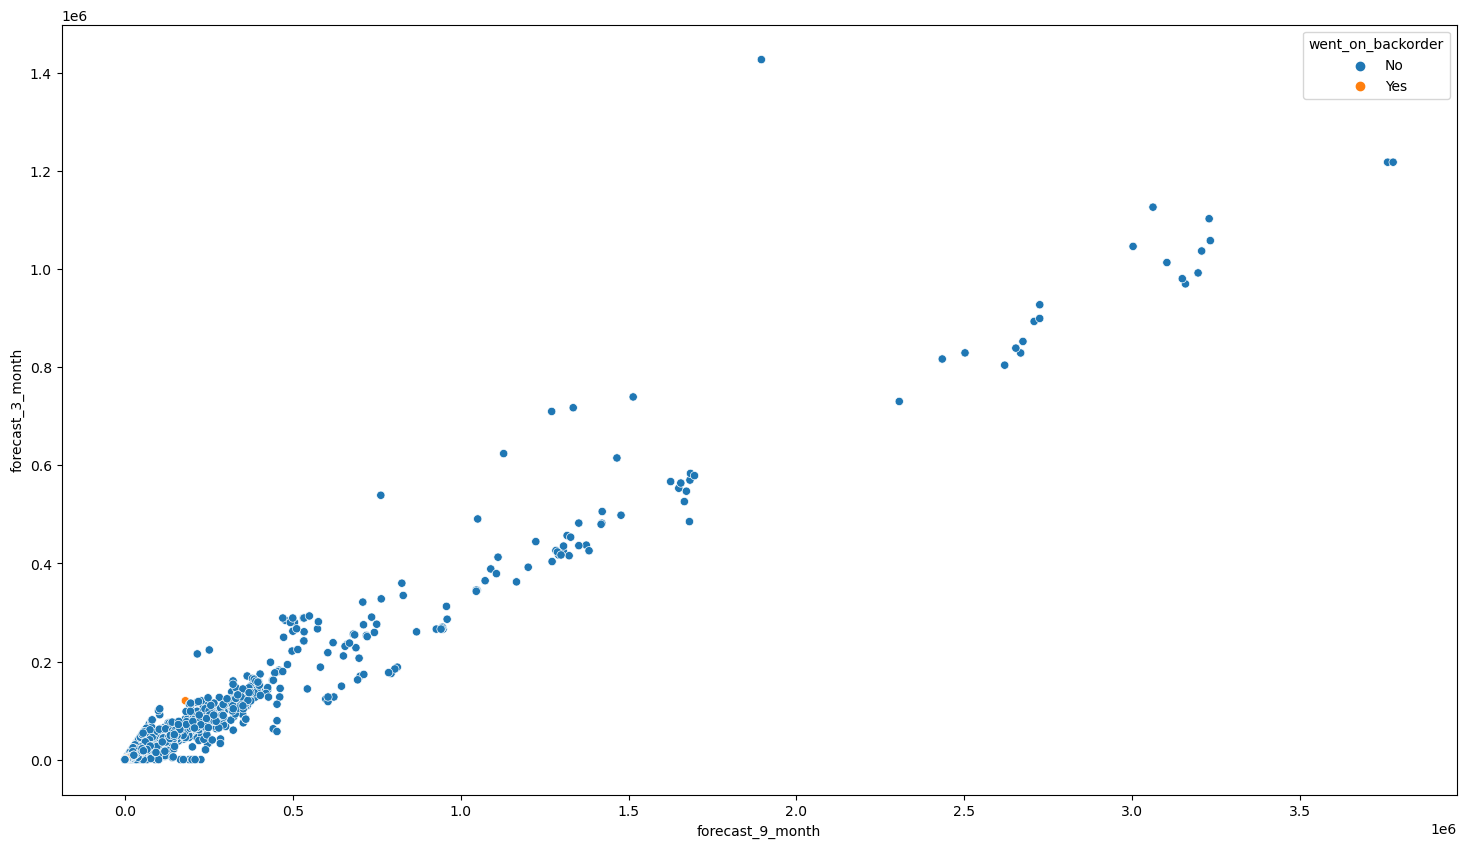

In [109]:
sns.scatterplot(df.forecast_9_month,df.forecast_3_month,hue=df.went_on_backorder)

<AxesSubplot:xlabel='sales_9_month', ylabel='sales_3_month'>

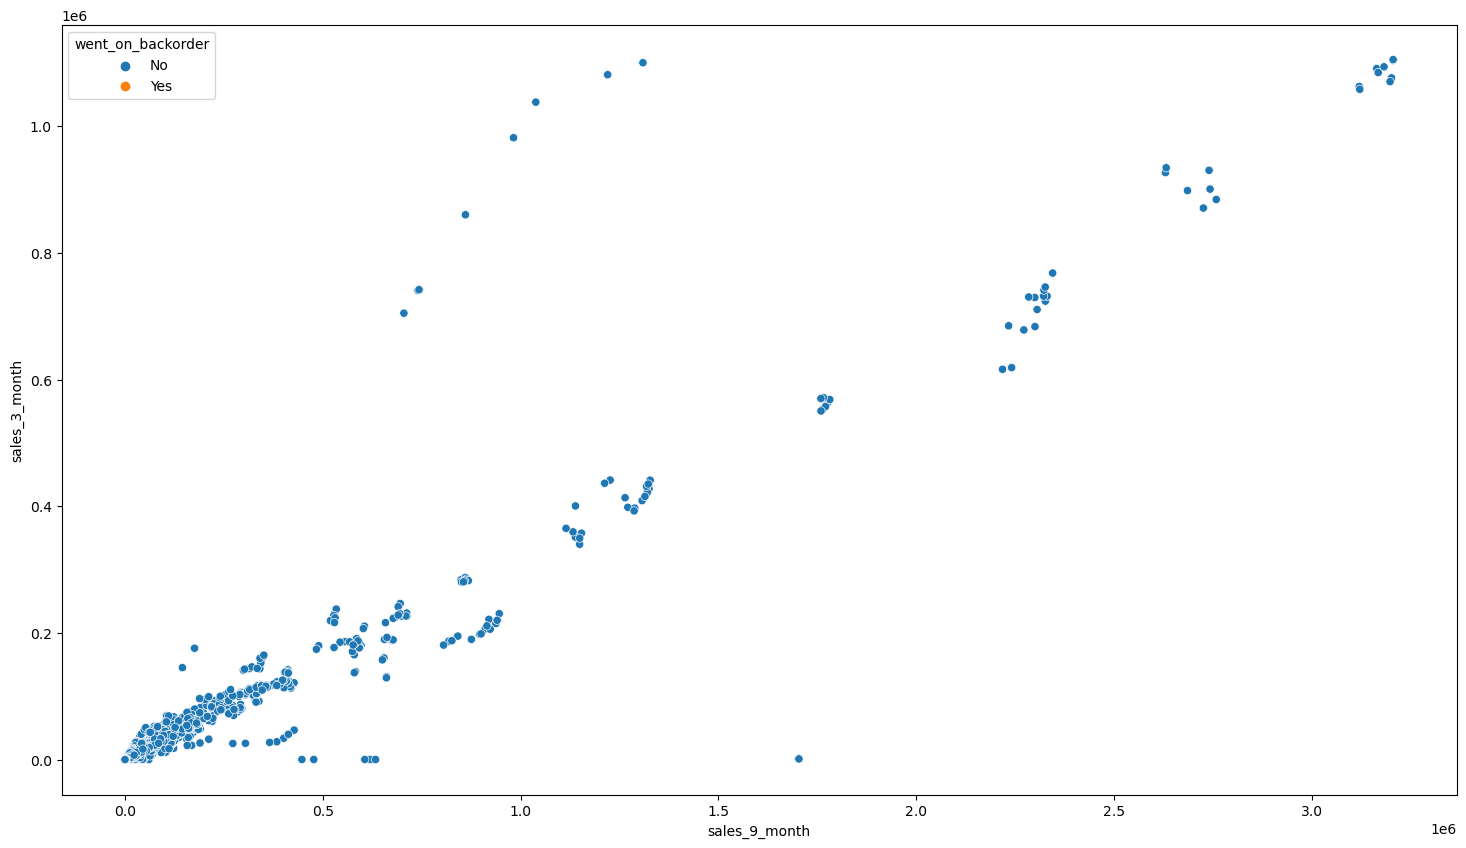

In [123]:
sns.scatterplot(df.sales_9_month,df.sales_3_month,hue=df.went_on_backorder)

<AxesSubplot:xlabel='forecast_3_month', ylabel='sales_3_month'>

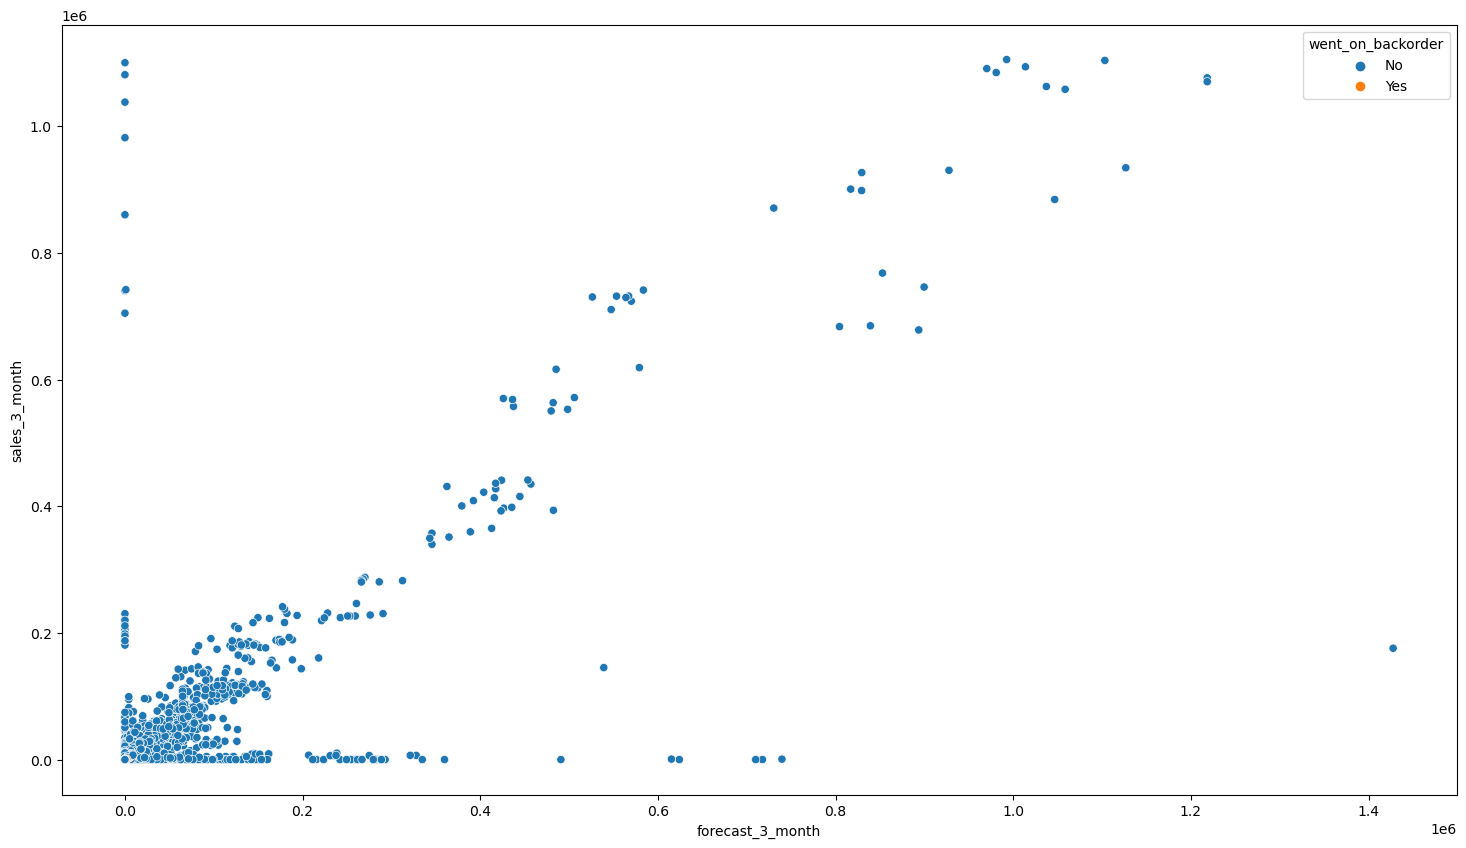

In [125]:
sns.scatterplot(df.forecast_3_month,df.sales_3_month,hue=df.went_on_backorder)

## 8. Treating the null values

In [89]:
num1 = num.copy(deep=True) 
num1.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.00,-99.00,0.0
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99,0.99,0.0
2,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.00,-99.00,0.0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.10,0.13,0.0
4,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,-99.00,-99.00,0.0


In [88]:
for i in num1:
    num1[i] = num1[i].replace(-99.00, np.nan)

num1.isnull().sum()

national_inv              4
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
pieces_past_due           1
perf_6_month_avg     129479
perf_12_month_avg    122051
local_bo_qty              1
dtype: int64

In [68]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

# Here we are impute the null values:
lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=0)
df_null = imp.fit_transform(num)

[IterativeImputer] Completing matrix with shape (1687861, 15)
[IterativeImputer] Ending imputation round 1/10, elapsed time 22.47
[IterativeImputer] Change: 36.7920330838409, scaled tolerance: 12334.404 
[IterativeImputer] Early stopping criterion reached.


In [69]:
df_aft = pd.DataFrame(df_null, columns = num.columns)
df_aft.head(2)

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
0,0.0,14.302969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.00,-99.00,0.0
1,2.0,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99,0.99,0.0


In [71]:
# Now we are impute the -99.00 values:

imp = IterativeImputer(estimator=lr,missing_values= -99.00, max_iter=10, verbose=2, imputation_order='roman',random_state=0)
df_bf = imp.fit_transform(df_aft)
df_bf = pd.DataFrame(df_bf, columns = num.columns)
df_bf.head()

[IterativeImputer] Completing matrix with shape (1687861, 15)
[IterativeImputer] Ending imputation round 1/10, elapsed time 20.32
[IterativeImputer] Change: 4622.423642177184, scaled tolerance: 12334.404 
[IterativeImputer] Early stopping criterion reached.


,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
0,0.0,14.302969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.779569,0.776774,0.0
1,2.0,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.990000,0.990000,0.0
2,2.0,14.302972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.779569,0.776774,0.0
3,7.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.100000,0.130000,0.0
4,8.0,14.302693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.779571,0.776776,0.0


In [10]:
df_bf.isnull().sum()

national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
dtype: int64

In [72]:
df2 = df_bf.copy()

for i in df.columns:
    if i not in df2:
        df2[i] = df[i].values

## 9. Transformation

In [73]:
df3=df2.dropna()
df2.skew()

national_inv         340.285891
lead_time              4.250033
in_transit_qty       166.183453
forecast_3_month     138.968366
forecast_6_month     138.961468
forecast_9_month     143.298917
sales_1_month        196.120048
sales_3_month        141.286421
sales_6_month        139.176753
sales_9_month        135.054231
min_bank             131.212688
pieces_past_due      412.392023
perf_6_month_avg      -1.656829
perf_12_month_avg     -1.698068
local_bo_qty         165.190597
dtype: float64

#INFERENCE : All features are **[ 'national_inv', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'local_bo_qty']** Higly skewed, So the data to be Transformation

In [74]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
c = ['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty']

In [75]:
df3[c] = pt.fit_transform(df3[c])

In [17]:
df3.skew()

national_inv        -50.924047
lead_time            -4.579459
in_transit_qty        1.536304
forecast_3_month      1.000305
forecast_6_month      0.785962
forecast_9_month      0.689087
sales_1_month         0.653692
sales_3_month         0.423210
sales_6_month         0.318309
sales_9_month         0.268139
min_bank              0.634893
pieces_past_due       7.984872
perf_6_month_avg     -0.333142
perf_12_month_avg    -0.312632
local_bo_qty          8.326112
dtype: float64

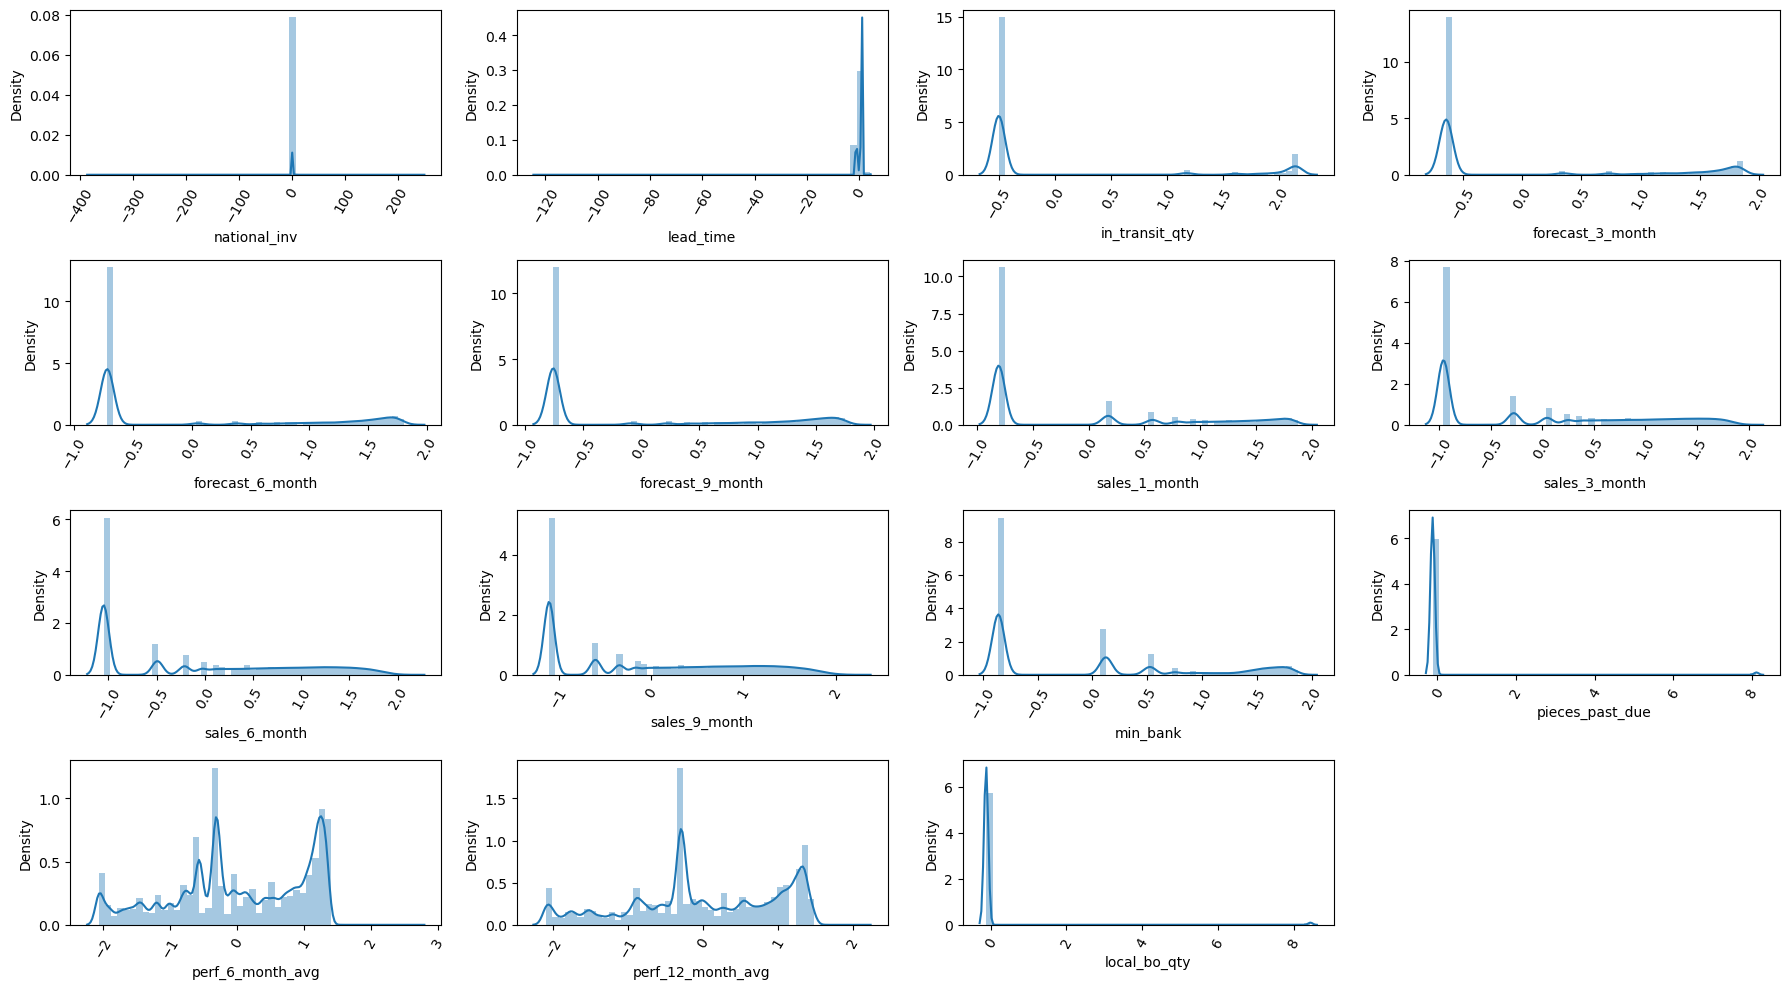

In [40]:
nrows = 4
ncols = 4
iterator = 1
for i in num.columns:
    plt.subplot(nrows,ncols,iterator)
    sns.distplot(df3[i])
    iterator += 1
    plt.xticks(rotation=60)
    plt.tight_layout()
plt.show()

## CAPPING THE OUTLIERS

In [76]:
for i in df3.select_dtypes(include=np.number).columns:
    q1 = df3[i].quantile(0.25)
    q3 = df3[i].quantile(0.75)
    iqr = q3 - q1
    ul = q3 + 1.5*iqr
    ll = q1 - 1.5*iqr  
    df3[i] = np.where(df3[i] > ul, ul, df3[i])
    df3[i] = np.where(df3[i] < ll, ll, df3[i])

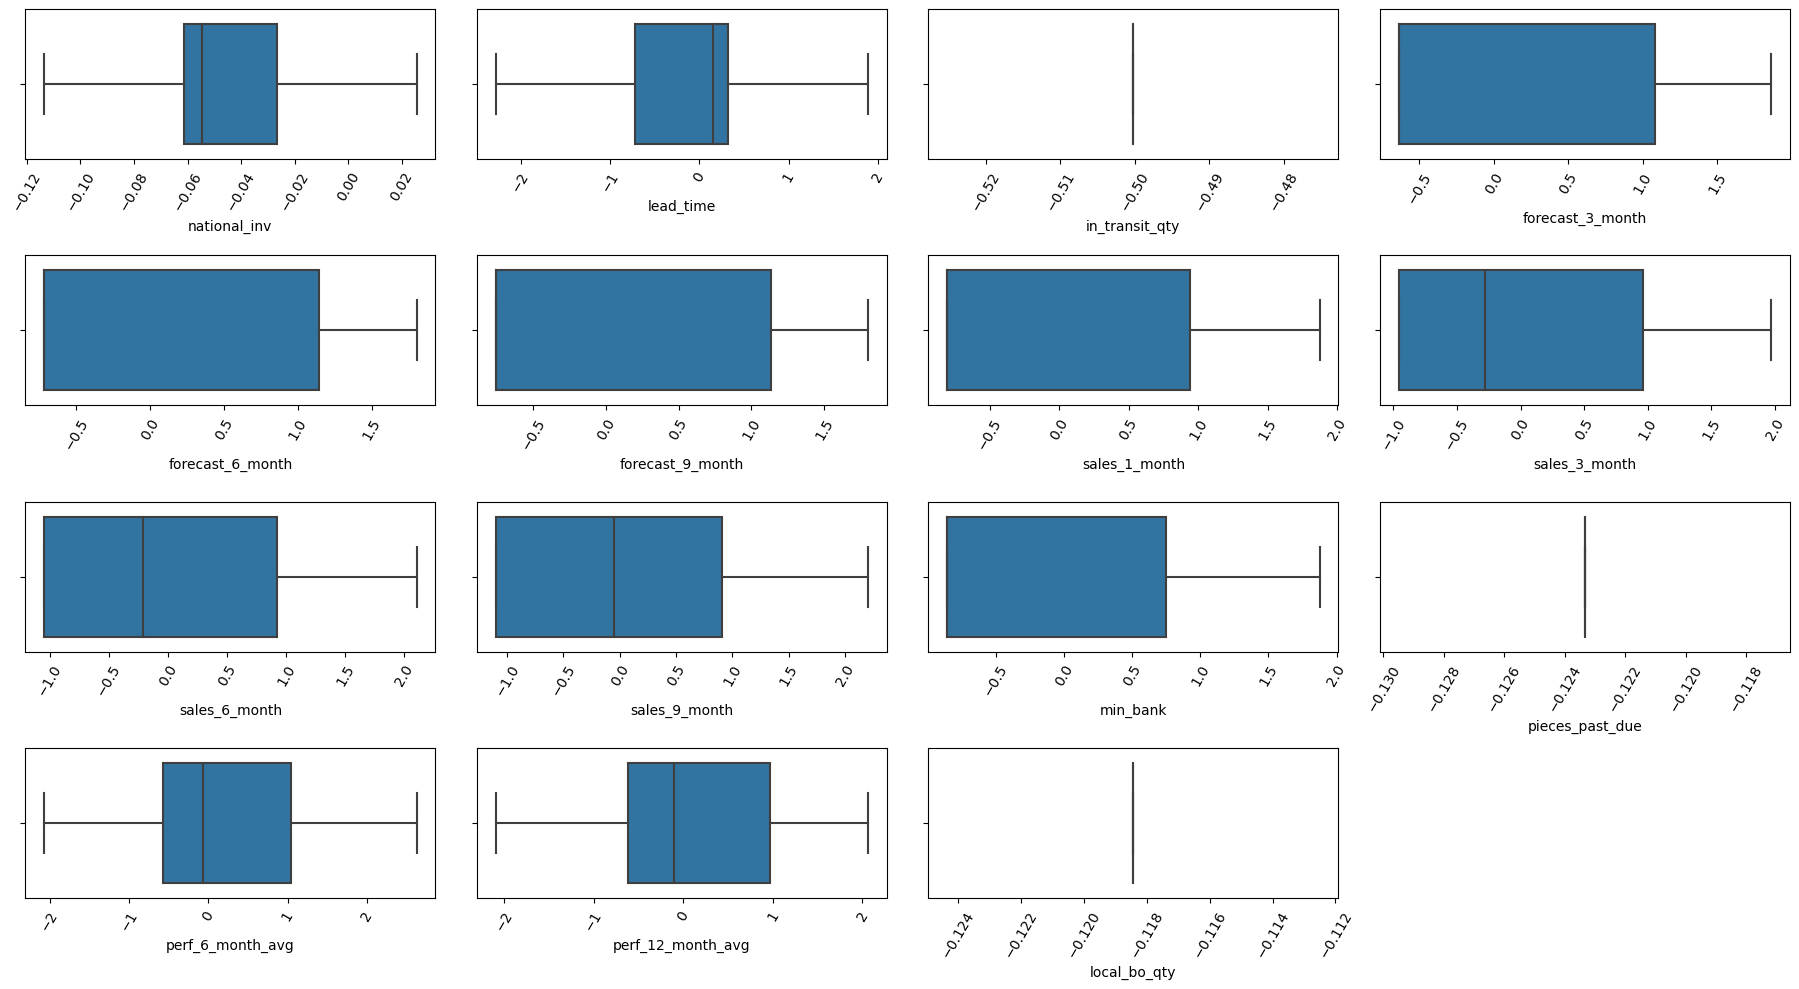

In [52]:
nrows = 4
ncols = 4
iterator = 1
for i in num.columns:
    plt.subplot(nrows,ncols,iterator)
    sns.boxplot(df3[i])
    iterator += 1
    plt.xticks(rotation=60)
    
plt.tight_layout()
plt.show()

In [18]:
df4 = df3.copy(deep=True)

In [58]:
num.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty'],
      dtype='object')

In [86]:
cat.columns

Index(['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
       'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

## 10. Encoding

In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat.columns:
    df3[i] = le.fit_transform(df3[i])

In [26]:
df3.head(2)

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,-0.064988,1.105892,-0.500204,-0.640153,-0.716508,-0.757403,-0.805595,-0.95858,-1.049791,-1.10232,...,-0.308592,-0.302857,-0.11842,0,0,0,0,1,0,0
1,-0.063013,0.326587,-0.500204,-0.640153,-0.716508,-0.757403,-0.805595,-0.95858,-1.049791,-1.10232,...,1.225077,1.341675,-0.11842,0,0,0,0,1,0,0


* All Categorical features are converted into (0,1)

<AxesSubplot:>

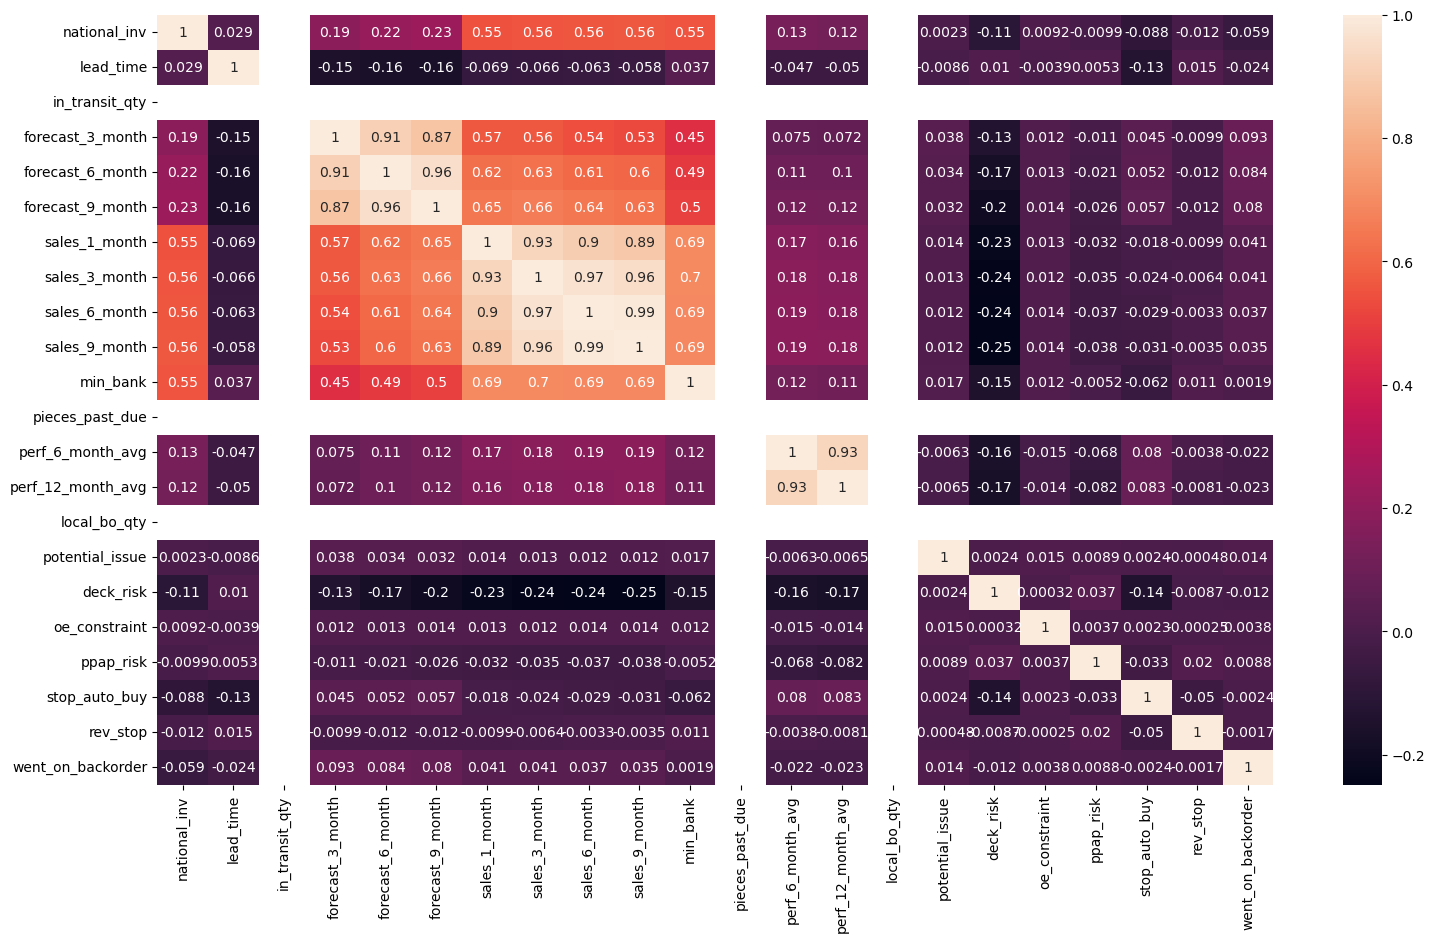

In [78]:
sns.heatmap(df3.corr(),annot=True)

## 11. Statistical Analysis

## Checking for Normality of Data.
* As we have a very large no. of records, we prefer to use Shapiro Test for testing whether the data are drawn from normally distributed 

In [22]:
df2.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,14.302969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.779569,0.776774,0.0,No,No,No,No,Yes,No,No
1,2.0,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.990000,0.990000,0.0,No,No,No,No,Yes,No,No
2,2.0,14.302972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.779569,0.776774,0.0,No,Yes,No,No,Yes,No,No
3,7.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.100000,0.130000,0.0,No,No,No,No,Yes,No,No
4,8.0,14.302693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.779571,0.776776,0.0,No,Yes,No,No,Yes,No,No


In [59]:
from scipy import stats
from scipy.stats import shapiro

for i in num.columns:
    stat, p_value = stats.jarque_bera(df2[i])
    print(i,'=',p_value,'/',(p_value>0.05))

national_inv = 0.0 / False
lead_time = 0.0 / False
in_transit_qty = 0.0 / False
forecast_3_month = 0.0 / False
forecast_6_month = 0.0 / False
forecast_9_month = 0.0 / False
sales_1_month = 0.0 / False
sales_3_month = 0.0 / False
sales_6_month = 0.0 / False
sales_9_month = 0.0 / False
min_bank = 0.0 / False
pieces_past_due = 0.0 / False
perf_6_month_avg = 0.0 / False
perf_12_month_avg = 0.0 / False
local_bo_qty = 0.0 / False


* From the above result, we can see that the p-value is less than 0.05, thus we can say that the data is not normally distributed.

In [60]:
# Two sample Ind Ttest
from scipy import stats

for i in num.columns:
    zero = df3.loc[df3.went_on_backorder==0,i]
    one = df3.loc[df3.went_on_backorder==1,i]
    
    teststats,pvalue = stats.ttest_ind(zero, one)
    print(i,'=',pvalue,'/',(pvalue>0.05))

national_inv = 2.778650788629052e-16 / False
lead_time = 1.6500139058156066e-201 / False
in_transit_qty = 1.3076160572061597e-110 / False
forecast_3_month = 0.0 / False
forecast_6_month = 0.0 / False
forecast_9_month = 0.0 / False
sales_1_month = 0.0 / False
sales_3_month = 0.0 / False
sales_6_month = 0.0 / False
sales_9_month = 0.0 / False
min_bank = 0.01613234290235696 / False
pieces_past_due = 0.0 / False
perf_6_month_avg = 2.343640068439714e-180 / False
perf_12_month_avg = 2.5748044055319036e-188 / False
local_bo_qty = 0.0 / False


In [ ]:
All Features are the significant variables, pvalue<0.05

## Mann-Whitney U test
The Mann-Whitney U test is a nonparametric test of the null hypothesis that the distribution underlying sample x is the same as the distribution underlying sample y. It is often used as a test of difference in location between distributions

In [ ]:
for i in num.columns:
    stat, p_value = stats.mannwhitneyu(df2[i],df2['went_on_backorder'])
    print(i,'=',p_value,'/',(p_value>0.05))

## Chi-Square Test for Independence

**The null and alternative hypothesis is:**
*    h0 : The variables are independent
*    h1 : The variables are not independent

In [47]:
c = ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
       'stop_auto_buy', 'rev_stop']

In [48]:
for i in c:
    table = pd.crosstab(df2[i], df2['went_on_backorder'])
    observed_value = table.values
    print(observed_value)

[[1675711   11242]
 [    856      51]]
[[1291000    9377]
 [ 385567    1916]]
[[1676330   11285]
 [    237       8]]
[[1474492    9534]
 [ 202075    1759]]
[[  60615     471]
 [1615952   10822]]
[[1675836   11293]
 [    731       0]]


In [49]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)

Test statistic: 4.925994493118827
p-value: 0.02645557114210823


* p-value is less than 0.05, All categorical features are significant variables.

## 12. MODEL 

In [15]:
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier



In [28]:
x = df3.drop(columns='went_on_backorder')
y = df3.went_on_backorder

In [29]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8,random_state=10)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1350288, 21)
(337572, 21)
(1350288,)
(337572,)


## 12. BALANCING THE DATA 

In [19]:
oversample = SMOTE(sampling_strategy=0.6)
x_train, y_train = oversample.fit_resample(xtrain, ytrain)
print(x_train.shape)
print(y_train.shape)

(2145988, 21)
(1350288,)


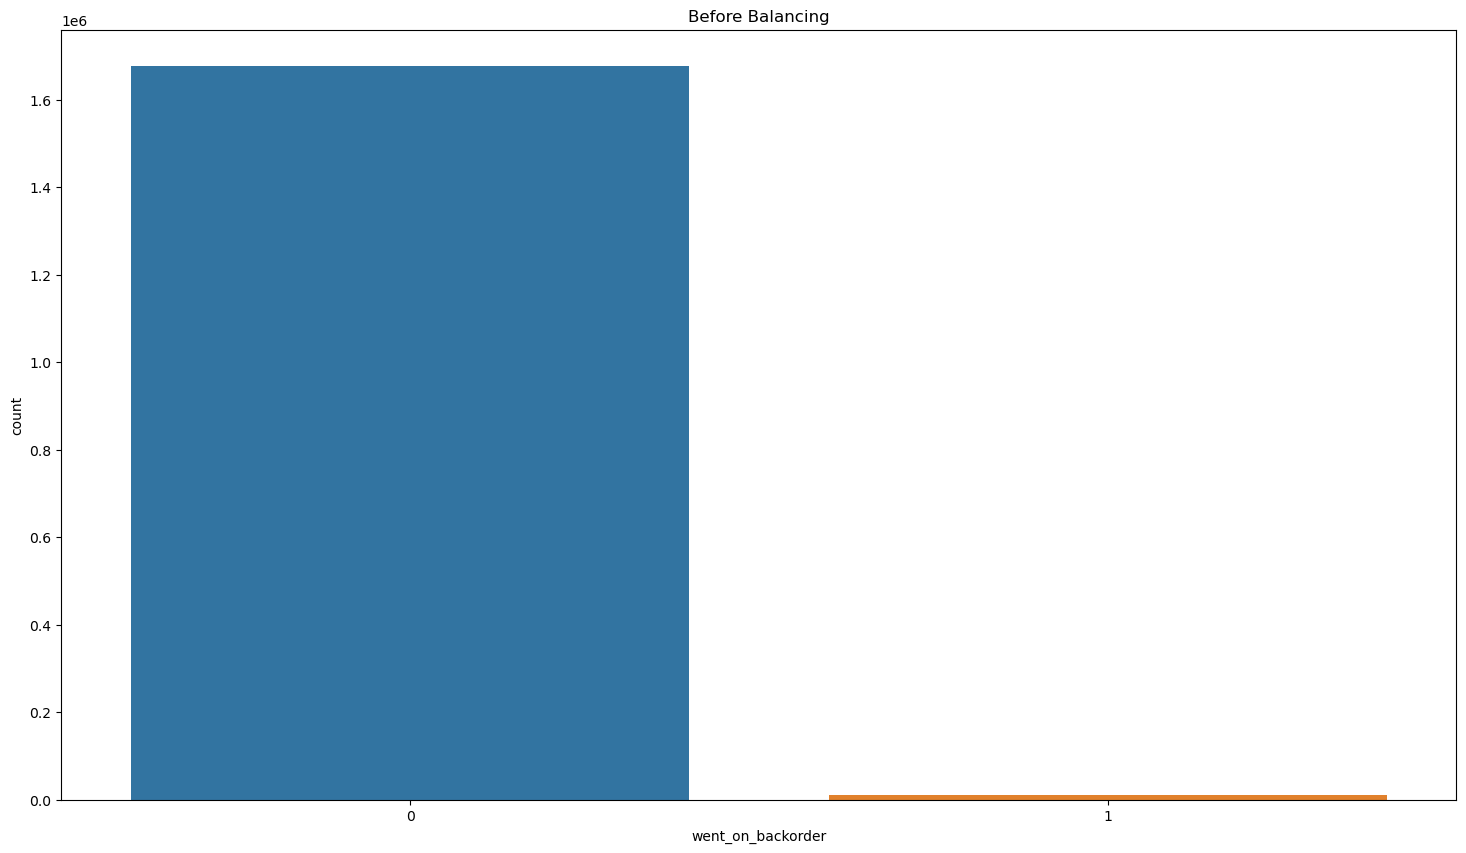

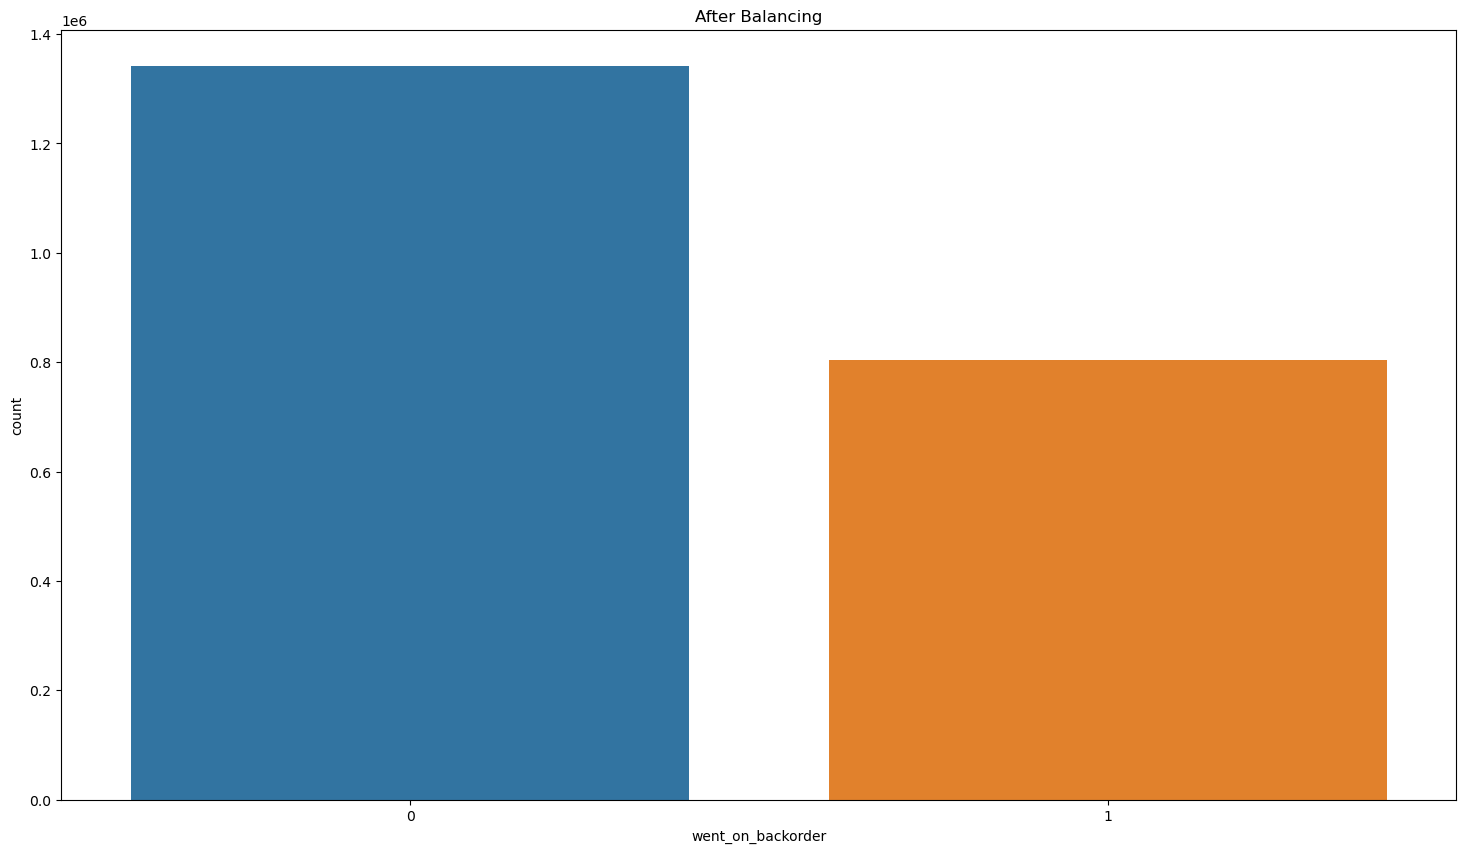

In [20]:
sns.countplot(df3['went_on_backorder'])
plt.title('Before Balancing')
plt.show()
sns.countplot(y_train)
plt.title('After Balancing')
plt.show()

In [ ]:
print(stats.ttest_ind(xtrain,xtest))
print(stats.ttest_ind(ytrain,ytest))

# 13. BASE MODEL

In [149]:
rf = RandomForestClassifier()

model2 = rf.fit(x_train,y_train)

ypred2 = model2.predict(xtest)

print('Accuracy Score',accuracy_score(ytest,ypred2))
print('Confusion Matrix',confusion_matrix(ytest,ypred2))
print('Classification Report',classification_report(ytest,ypred2))

Accuracy Score 0.9938087282120555
Confusion Matrix [[334315   1009]
 [  1081   1167]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00    335324
           1       0.54      0.52      0.53      2248

    accuracy                           0.99    337572
   macro avg       0.77      0.76      0.76    337572
weighted avg       0.99      0.99      0.99    337572



In [150]:
print('Train data accuracy score',model2.score(x_train,y_train))
print('Test data accuracy score',model2.score(xtest,ytest))

Train data accuracy score 0.9974356799758433
Test data accuracy score 0.9938087282120555


In [21]:
def base_models():
    models = dict()
    models['lg'] = LogisticRegression()
    models['dtree'] = DecisionTreeClassifier()
    models['rf'] = RandomForestClassifier()
    models['etree'] = ExtraTreesClassifier()
    models['adaboost'] = AdaBoostClassifier()
    models['gbm'] = GradientBoostingClassifier()
    models['xbg'] = XGBClassifier()
    models['lgbm'] = LGBMClassifier()
    return models

In [23]:
#Evaluate the model...

from sklearn.model_selection import StratifiedKFold,cross_val_score 

def eval_models(model):
    cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
    scores = cross_val_score(estimator = model,X = x,y = y,scoring='f1',cv=cv,error_score='raise',n_jobs=-1)
    return scores

In [24]:
# Build the models....

models = base_models()

#list fro result and model names
result,names = list(),list()

for name,model in models.items():
    scores = eval_models(model)
    result.append(scores) # This will save the f1 score
    names.append(name) #This will save the name of the model...
    print(names,np.mean(result),np.std(result))
    print('>%s %.3f (%.3f)' % (name,np.mean(scores),np.std(scores)))

['lg'] 0.0050683250360064975 0.002393495713931271
>lg 0.005 (0.002)
['lg', 'dtree'] 0.21469125388021942 0.20969040599588212
>dtree 0.424 (0.007)
['lg', 'dtree', 'rf'] 0.2903550389367374 0.20198967405965546
>rf 0.442 (0.010)
['lg', 'dtree', 'rf', 'etree'] 0.3550374404944376 0.20781046316512955
>etree 0.549 (0.012)
['lg', 'dtree', 'rf', 'etree', 'adaboost'] 0.29078446184043516 0.22602216599457683
>adaboost 0.034 (0.011)
['lg', 'dtree', 'rf', 'etree', 'adaboost', 'gbm'] 0.24659162461139153 0.2287887999273793
>gbm 0.026 (0.007)
['lg', 'dtree', 'rf', 'etree', 'adaboost', 'gbm', 'xbg'] 0.2279986824601462 0.21668926049573348
>xbg 0.116 (0.010)
['lg', 'dtree', 'rf', 'etree', 'adaboost', 'gbm', 'xbg', 'lgbm'] 0.20984170188535395 0.20835719277937487
>lgbm 0.083 (0.013)


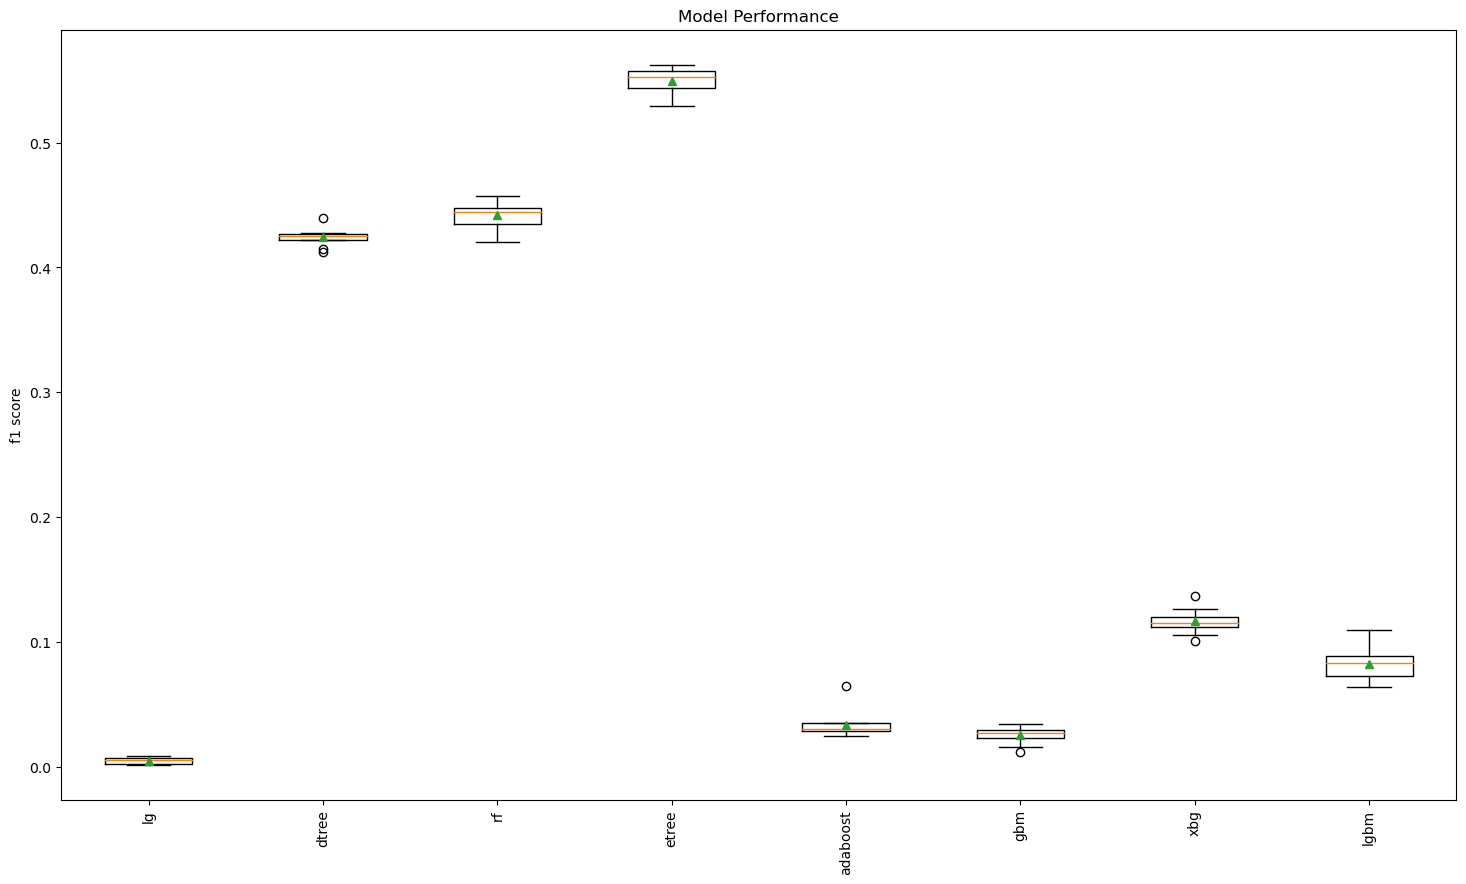

In [25]:
#plotting the output
plt.boxplot(result,labels=names,showmeans = True)
plt.xticks(rotation=90)
plt.ylabel('f1 score')
plt.title('Model Performance')
plt.show()

* Based on the model performance we considering that the ExtraTreeClassifier has a good **F1 Score**

In [27]:
xg =  XGBClassifier()

model_xg = xg.fit(x_train,y_train)

ypred_xg = model_xg.predict(xtest)

print('Accuracy Score',accuracy_score(ytest,ypred_xg))
print('Confusion Matrix',confusion_matrix(ytest,ypred_xg))
print('Classification Report',classification_report(ytest,ypred_xg))

Accuracy Score 0.97774104487339
Confusion Matrix [[328959   6365]
 [  1149   1099]]
Classification Report               precision    recall  f1-score   support

           0       1.00      0.98      0.99    335324
           1       0.15      0.49      0.23      2248

    accuracy                           0.98    337572
   macro avg       0.57      0.73      0.61    337572
weighted avg       0.99      0.98      0.98    337572



In [ ]:
## SMOTE USING 0.40

In [43]:
oversample = SMOTE(sampling_strategy=0.4)
x_train1, y_train1 = oversample.fit_resample(xtrain, ytrain)
print(x_train1.shape)
print(y_train1.shape)

(1877740, 21)
(1877740,)


## 14. ADVANCE MODEL

In [34]:
et =  ExtraTreesClassifier()

model_et1 = et.fit(x_train1,y_train1)

ypred_et1 = model_et1.predict(xtest)

print('Accuracy Score',accuracy_score(ytest,ypred_et1))
print('Confusion Matrix',confusion_matrix(ytest,ypred_et1))
print('Classification Report',classification_report(ytest,ypred_et1))

Accuracy Score 0.9941967935729267
Confusion Matrix [[334373    951]
 [  1008   1240]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00    335324
           1       0.57      0.55      0.56      2248

    accuracy                           0.99    337572
   macro avg       0.78      0.77      0.78    337572
weighted avg       0.99      0.99      0.99    337572



In [36]:
print('Train data accuracy score',model_et1.score(x_train1,y_train1))
print('Test data accuracy score',model_et1.score(xtest,ytest))

Train data accuracy score 0.9976524258100945
Test data accuracy score 0.9941967935729267


In [35]:
ad =  AdaBoostClassifier()

model_ad = ad.fit(x_train1,y_train1)

ypred_ad = model_ad.predict(xtest)

print('Accuracy Score',accuracy_score(ytest,ypred_ad))
print('Confusion Matrix',confusion_matrix(ytest,ypred_ad))
print('Classification Report',classification_report(ytest,ypred_ad))

Accuracy Score 0.9168710675055988
Confusion Matrix [[307799  27525]
 [   537   1711]]
Classification Report               precision    recall  f1-score   support

           0       1.00      0.92      0.96    335324
           1       0.06      0.76      0.11      2248

    accuracy                           0.92    337572
   macro avg       0.53      0.84      0.53    337572
weighted avg       0.99      0.92      0.95    337572



In [19]:
from sklearn.naive_bayes import GaussianNB

## 15. SCORE CARD

In [20]:
lg =LogisticRegression(random_state=10)
dt= DecisionTreeClassifier(random_state=10)
rf= RandomForestClassifier(random_state=10)
et= ExtraTreesClassifier()
gb= GaussianNB()
ada= AdaBoostClassifier(random_state=10)
gbm= GradientBoostingClassifier(random_state=10)
xgb= XGBClassifier(random_state=10)
lgbm= LGBMClassifier(random_state=10)

In [21]:
from sklearn.metrics import recall_score,precision_score,accuracy_score,f1_score

In [22]:
def models(mod,xtrain,ytrain,xtest,ytest):
    l = [str(mod).split('(')[0]]
    model1 = mod.fit(xtrain,ytrain)
    ypred = model1.predict(xtest)  
    l.append(model1.score(xtrain,ytrain))   # Training accuracy
    l.append(model1.score(xtest,ytest))     # Testing accuracy
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(ytest,ypred).ravel()
    l.append(tn)   
    l.append(fp)
    l.append(fn)
    l.append(tp)
    
    l.append(round(recall_score(ytest,ypred),2))     # recall score
    l.append(round(precision_score(ytest,ypred),2))  # Presicion score
    l.append(round(f1_score(ytest,ypred),2))        # f1 score
    return l

In [53]:
score_card = pd.DataFrame(columns = ['Model','Train_ACC','Test_ACC','TN','FP','FN','TP','recall','Precision','F1 score'])

In [46]:
oversample = SMOTE(sampling_strategy=0.4)
xtrain2, ytrain2 = oversample.fit_resample(xtrain, ytrain)

In [47]:
perf1 = models(lg,xtrain2,ytrain2,xtest,ytest)
perf2 = models(dt,xtrain2,ytrain2,xtest,ytest)
perf3 = models(rf,xtrain2,ytrain2,xtest,ytest)
perf4 = models(gb,xtrain2,ytrain2,xtest,ytest)
perf5 = models(ada,xtrain2,ytrain2,xtest,ytest)
perf6 = models(gbm,xtrain2,ytrain2,xtest,ytest)
perf7 = models(xgb,xtrain2,ytrain2,xtest,ytest)
perf8 = models(lgbm,xtrain2,ytrain2,xtest,ytest)
perf9 = models(et,xtrain2,ytrain2,xtest,ytest)

In [54]:
score_card.loc[len(score_card)] = perf1
score_card.loc[len(score_card)] = perf2
score_card.loc[len(score_card)] = perf3
score_card.loc[len(score_card)] = perf4
score_card.loc[len(score_card)] = perf5
score_card.loc[len(score_card)] = perf6
score_card.loc[len(score_card)] = perf7
score_card.loc[len(score_card)] = perf8
score_card.loc[len(score_card)] = perf9

**SCORE CARD FOR 40% SMOTE DATA**

In [55]:
score_card.sort_values(by='F1 score',ascending=False)

,Model,Train_ACC,Test_ACC,TN,FP,FN,TP,recall,Precision,F1 score
8,ExtraTreesClassifier,0.997779,0.995014,334550,774,909,1339,0.60,0.63,0.61
2,RandomForestClassifier,0.997778,0.994215,334477,847,1106,1142,0.51,0.57,0.54
1,DecisionTreeClassifier,0.997779,0.988814,332818,2506,1270,978,0.44,0.28,0.34
6,XGBClassifier,0.976625,0.981933,330541,4783,1316,932,0.41,0.16,0.23
7,LGBMClassifier,0.949405,0.964896,324417,10907,943,1305,0.58,0.11,0.18
5,GradientBoostingClassifier,0.917565,0.945558,317636,17688,690,1558,0.69,0.08,0.14
4,AdaBoostClassifier,0.888485,0.928892,311943,23381,623,1625,0.72,0.06,0.12
0,LogisticRegression,0.855615,0.899544,302038,33286,625,1623,0.72,0.05,0.09
3,GaussianNB,0.760827,0.701039,234635,100689,232,2016,0.90,0.02,0.04


In [30]:
#SMOTE : 60%
oversample = SMOTE(sampling_strategy=0.6)
xtrain1, ytrain1 = oversample.fit_resample(xtrain, ytrain)

In [31]:
perf1 = models(lg,xtrain1,ytrain1,xtest,ytest)
perf2 = models(dt,xtrain1,ytrain1,xtest,ytest)
perf3 = models(rf,xtrain1,ytrain1,xtest,ytest)
perf4 = models(gb,xtrain1,ytrain1,xtest,ytest)
perf5 = models(ada,xtrain1,ytrain1,xtest,ytest)
perf6 = models(gbm,xtrain1,ytrain1,xtest,ytest)
perf7 = models(xgb,xtrain1,ytrain1,xtest,ytest)
perf8 = models(lgbm,xtrain1,ytrain1,xtest,ytest)

In [33]:
perf9 = models(et,xtrain1,ytrain1,xtest,ytest)

In [42]:
best_1 = pd.DataFrame(columns = ['Model','Train_ACC','Test_ACC','TN','FP','FN','TP','recall','Precision','F1 score'])

In [43]:
best_1.loc[len(best_1)] = perf1
best_1.loc[len(best_1)] = perf2
best_1.loc[len(best_1)] = perf3
best_1.loc[len(best_1)] = perf4
best_1.loc[len(best_1)] = perf5
best_1.loc[len(best_1)] = perf6
best_1.loc[len(best_1)] = perf7
best_1.loc[len(best_1)] = perf8
best_1.loc[len(best_1)] = perf9

**SCORE CARD FOR 60% SMOTE DATA**

In [44]:
best_1.sort_values(by='F1 score',ascending=False)

,Model,Train_ACC,Test_ACC,TN,FP,FN,TP,recall,Precision,F1 score
8,ExtraTreesClassifier,0.997432,0.994490,334372,952,908,1340,0.60,0.58,0.59
2,RandomForestClassifier,0.997432,0.993776,334318,1006,1095,1153,0.51,0.53,0.52
1,DecisionTreeClassifier,0.997432,0.988337,332640,2684,1253,995,0.44,0.27,0.34
6,XGBClassifier,0.974712,0.976215,328468,6856,1173,1075,0.48,0.14,0.21
7,LGBMClassifier,0.946600,0.954164,320674,14650,823,1425,0.63,0.09,0.16
5,GradientBoostingClassifier,0.909025,0.924736,310447,24877,530,1718,0.76,0.06,0.12
4,AdaBoostClassifier,0.883094,0.902468,302868,32456,468,1780,0.79,0.05,0.10
0,LogisticRegression,0.845950,0.866280,290642,44682,458,1790,0.80,0.04,0.07
3,GaussianNB,0.776071,0.690567,231073,104251,205,2043,0.91,0.02,0.04


* EXTRATREECLASSIFIER

In [62]:
et =  ExtraTreesClassifier()

model_et = et.fit(xtrain1,ytrain1)

ypred_et = model_et.predict(xtest)

print('Classification Report',classification_report(ytest,ypred_et))

Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00    335324
           1       0.63      0.59      0.61      2248

    accuracy                           0.99    337572
   macro avg       0.81      0.80      0.80    337572
weighted avg       0.99      0.99      0.99    337572



In [79]:
print(accuracy_score(ytest,ypred_et))
print(confusion_matrix(ytest,ypred_et))
print(classification_report(ytest,ypred_et))

0.9949640373016719
[[334540    784]
 [   916   1332]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    335324
           1       0.63      0.59      0.61      2248

    accuracy                           0.99    337572
   macro avg       0.81      0.80      0.80    337572
weighted avg       0.99      0.99      0.99    337572



In [80]:
print('Train data accuracy score',model_et.score(xtrain1,ytrain1))
print('Test data accuracy score',model_et.score(xtest,ytest))

Train data accuracy score 0.9977787127078296
Test data accuracy score 0.9949640373016719


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'national_inv'),
  Text(1, 0, 'forecast_3_month'),
  Text(2, 0, 'forecast_9_month'),
  Text(3, 0, 'forecast_6_month'),
  Text(4, 0, 'perf_6_month_avg'),
  Text(5, 0, 'perf_12_month_avg'),
  Text(6, 0, 'sales_9_month'),
  Text(7, 0, 'sales_3_month'),
  Text(8, 0, 'min_bank'),
  Text(9, 0, 'sales_6_month'),
  Text(10, 0, 'sales_1_month'),
  Text(11, 0, 'lead_time'),
  Text(12, 0, 'deck_risk'),
  Text(13, 0, 'ppap_risk'),
  Text(14, 0, 'stop_auto_buy'),
  Text(15, 0, 'potential_issue'),
  Text(16, 0, 'oe_constraint'),
  Text(17, 0, 'rev_stop'),
  Text(18, 0, 'pieces_past_due'),
  Text(19, 0, 'in_transit_qty'),
  Text(20, 0, 'local_bo_qty')])

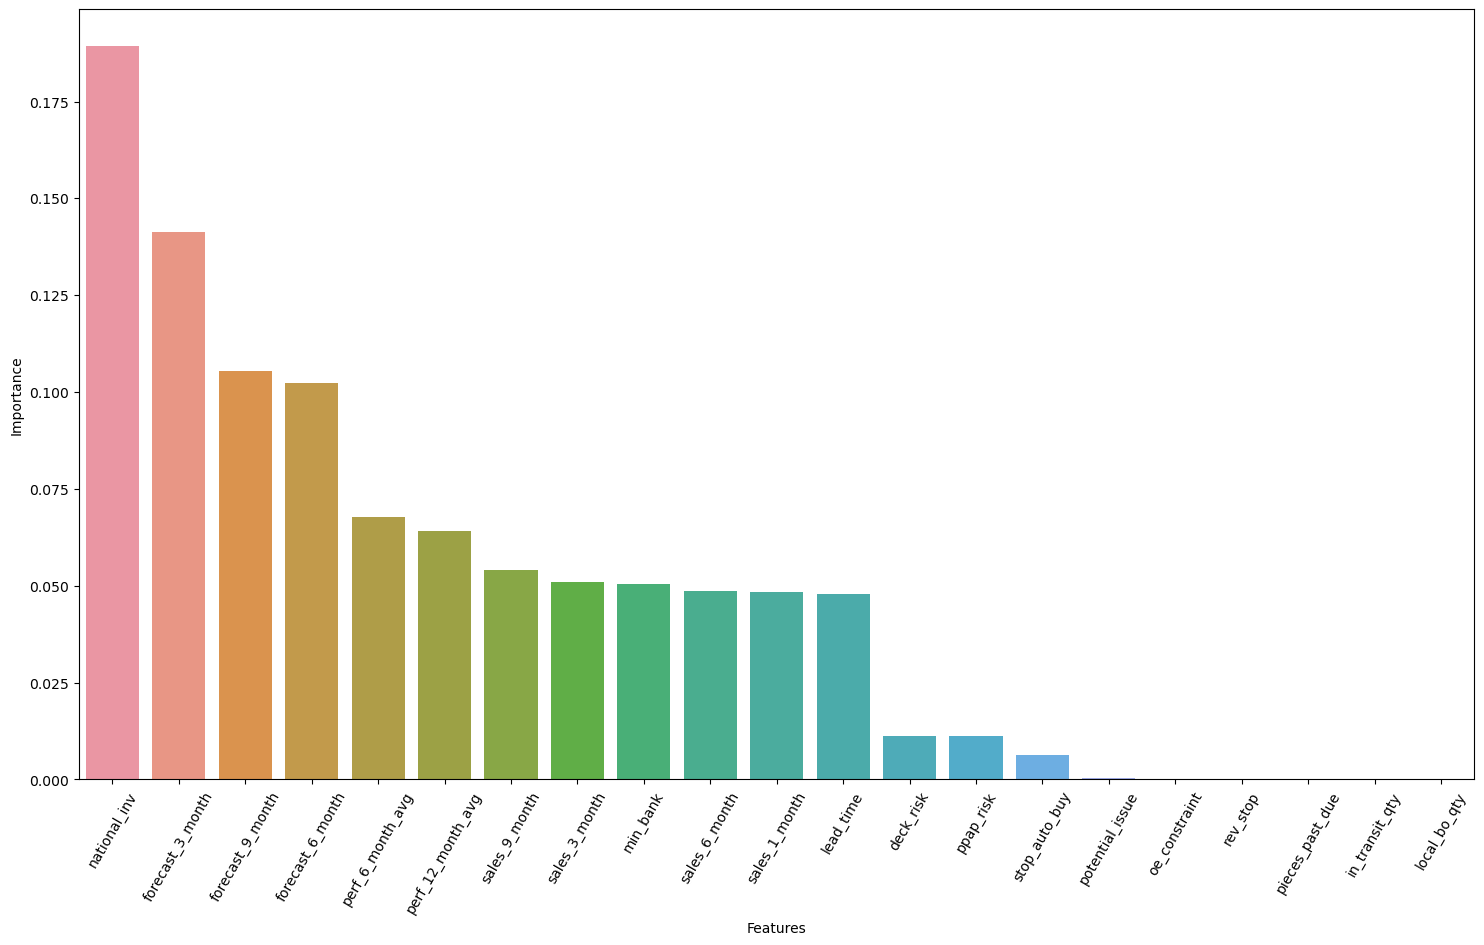

In [63]:
model_et.feature_importances_
m = pd.DataFrame({'Features':xtrain.columns,'Importance':model_et.feature_importances_})
m1 = m.sort_values(by='Importance',ascending=False)
sns.barplot(m1['Features'],m1['Importance'])
plt.xticks(rotation=60)

* According to our ExtraTreeClassifier model, national_inv is the most important feature and followed by forecast_3_month, orecast_6_month, forecast_9_month and perf_6_avg. This gives us more insights on better prediction of product back-orders.

## 16. ROC Curve

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [ExtraTreesClassifier(random_state=1234), 
               DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234),
              XGBClassifier(random_state=1234)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(xtrain, ytrain)
    yproba = model.predict_proba(xtest)[::,1]
    
    fpr, tpr, thershold = roc_curve(ytest,  yproba)
    auc = roc_auc_score(ytest, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

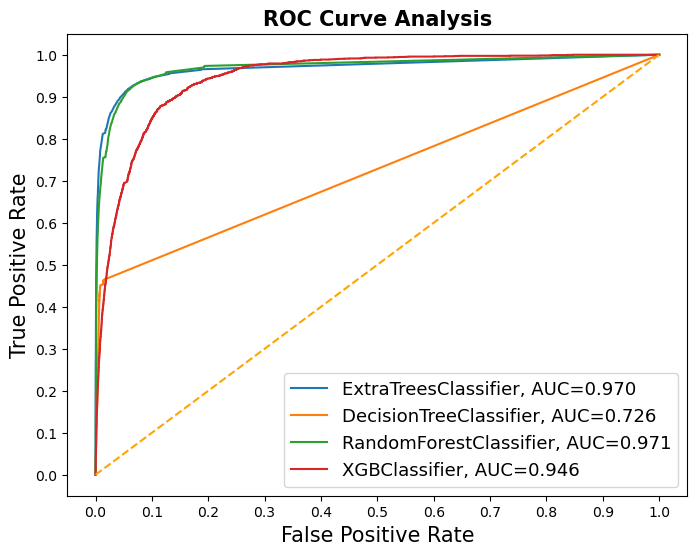

In [59]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

* From the ROC Curve graph, we conclude that both ExtraTreeClassifier and RandomForestClassifier has highest AUC_Score , hence considered best models.